# Signal Processing and Analysis of EEG Data Using Python

## [Arya Koureshi](https://github.com/AryaKoureshi)
### arya.koureshi@gmail.com

---


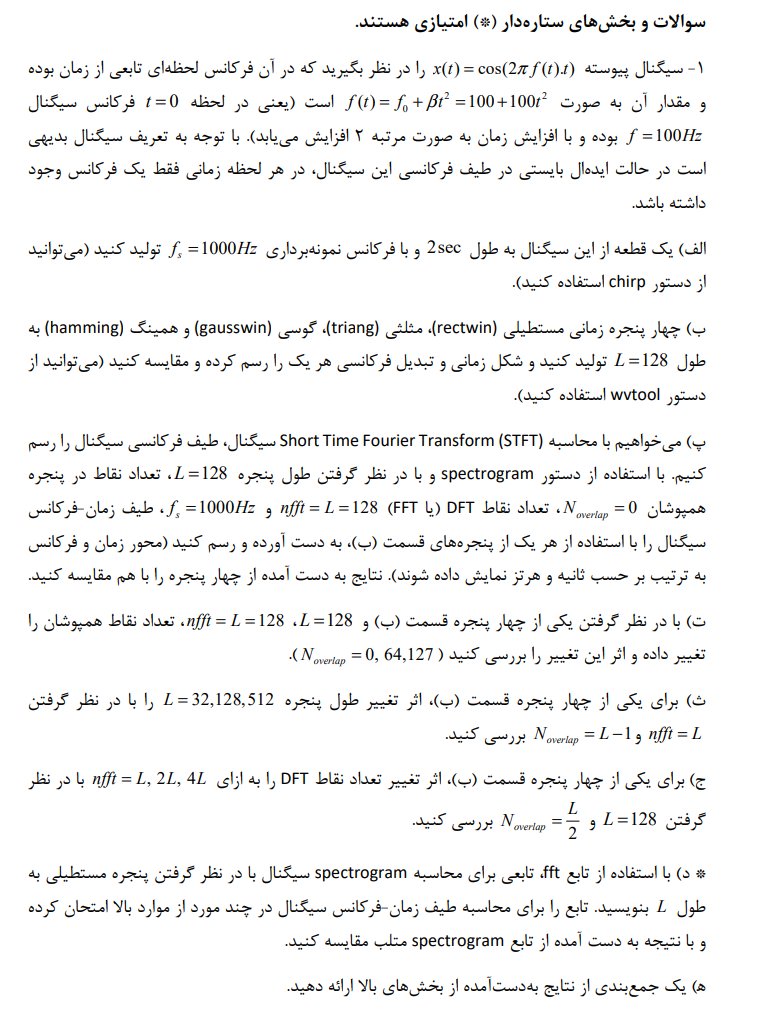
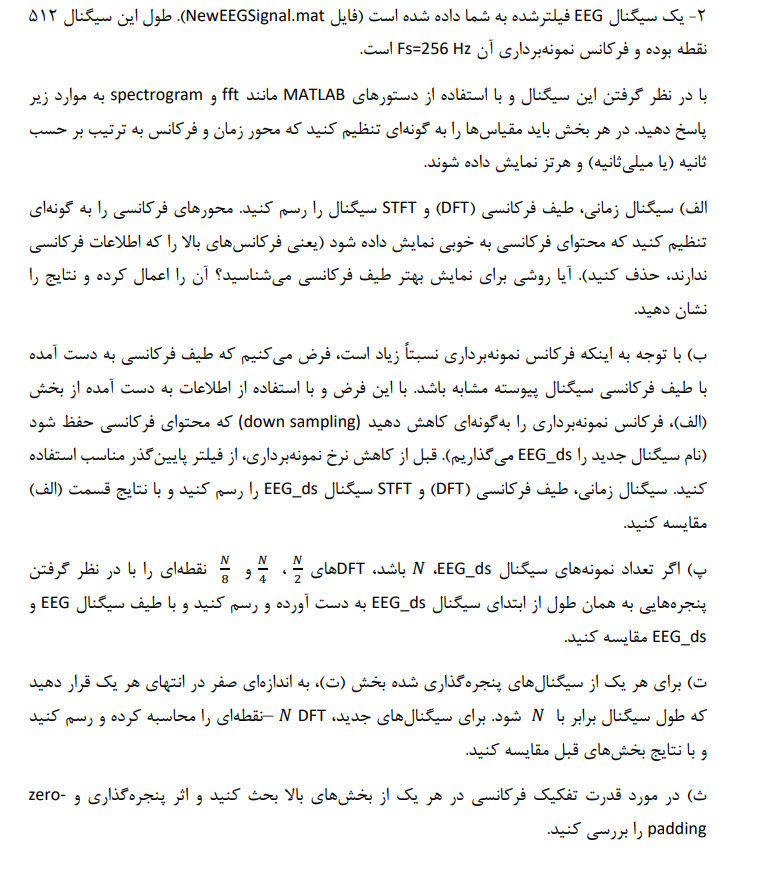
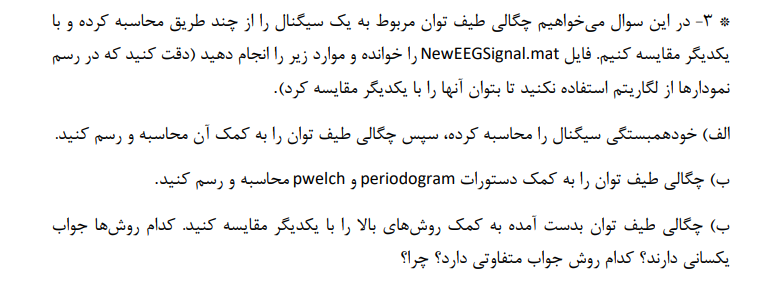

---

#### Question 1
##### Part a

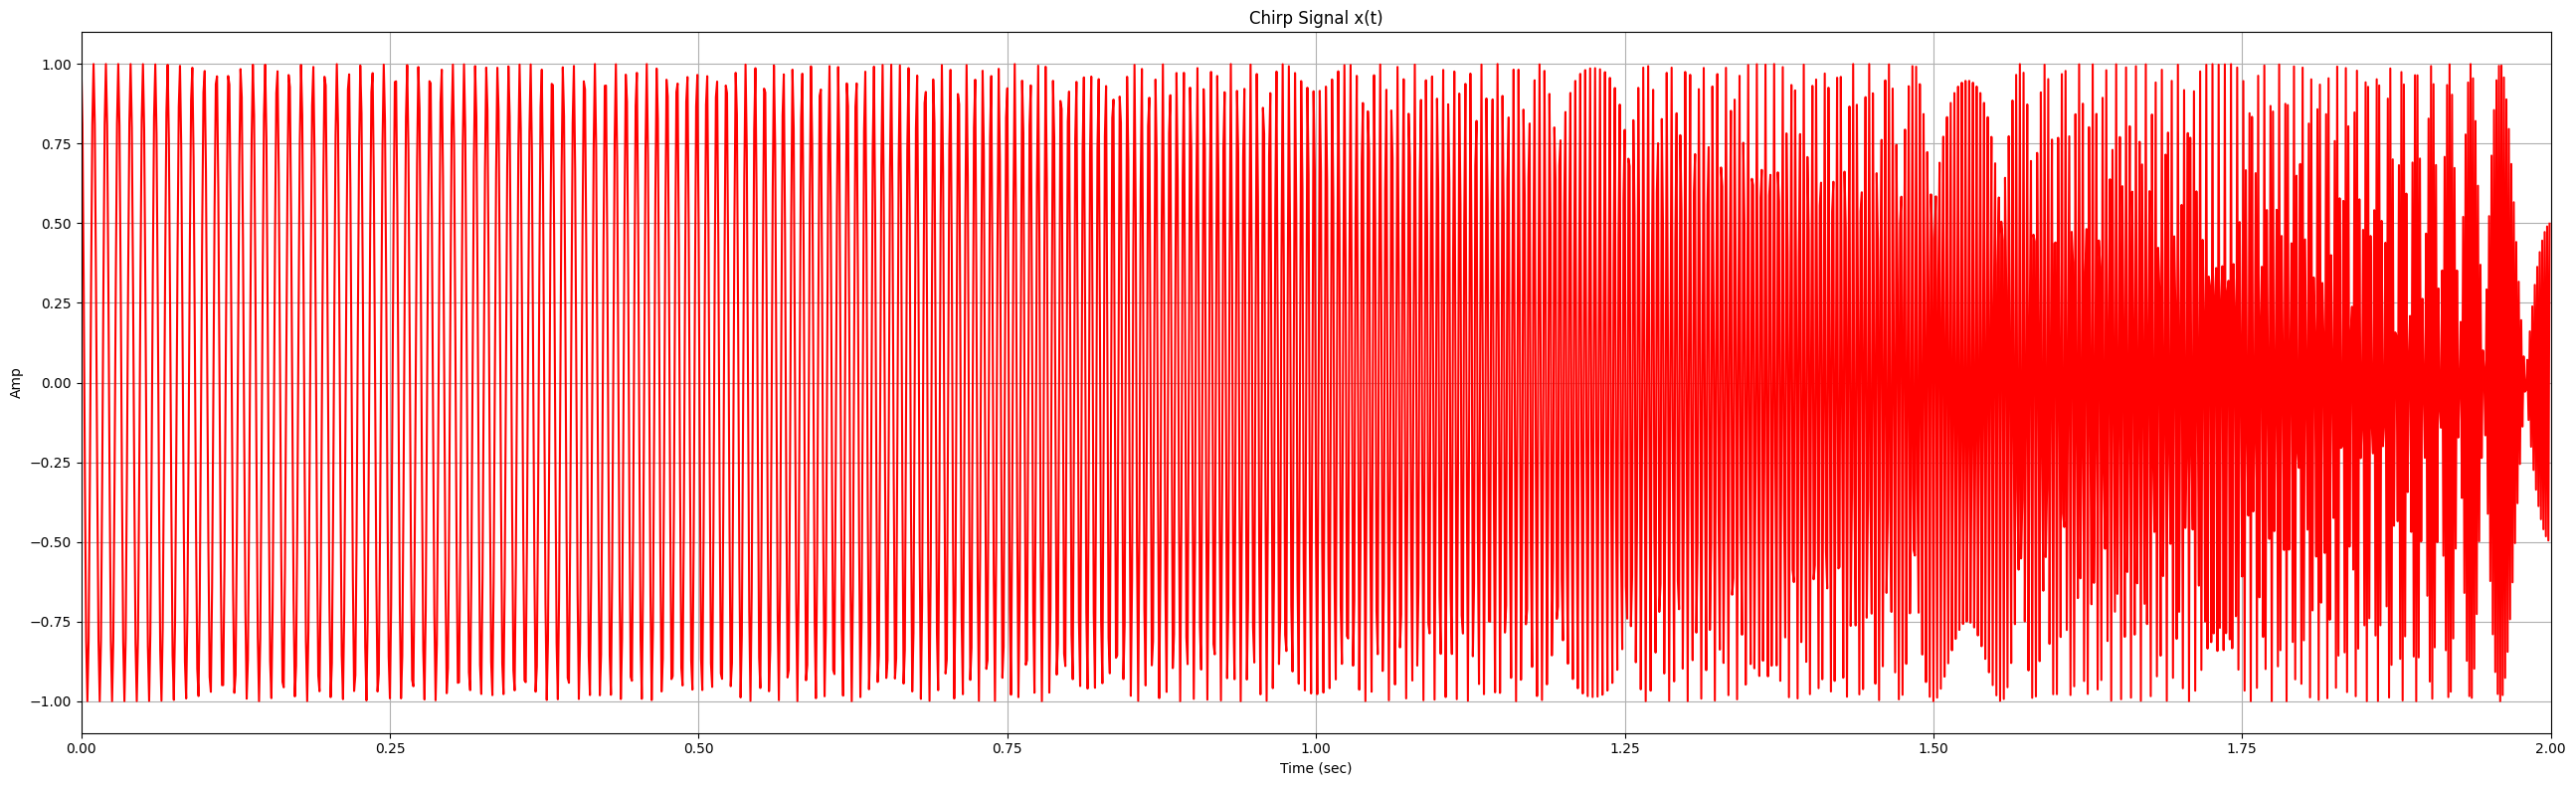

In [1]:
#%% Question 1
# part a
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, get_window, spectrogram

T = 2.0  # sec
fs = 1000  # Hz
t = np.linspace(0, T, int(T * fs), endpoint=False)
f0 = 100 # Hz
beta = 100
f_t = f0 + beta * t**2  

x_t = chirp(t, f0=f0, f1=500, t1=T, method='quadratic')
x_t2= np.cos(2 * np.pi * f_t * t)

plt.figure(figsize=(26, 8))
plt.plot(t, x_t, 'r')
plt.xlabel('Time (sec)')
plt.ylabel('Amp')
plt.title('Chirp Signal x(t)')
plt.grid(True)
plt.xlim([0, 2])
plt.tight_layout()
plt.show()

##### Part b

I create four window functions, specifically rectangular, triangular, Gaussian, and Hamming, each with a length of 128. Now, let's examine and contrast these functions with respect to their time and frequency domain properties.

Let's delve into the characteristics of four common window functions:

- **Rectangular Window (Rect)**: A simple window with constant amplitude. Its formula is: 
    $$
    w(n) = 1, \text{ for } 0 \leq n < N
    $$

- **Triangular Window (Triang)**: A triangular-shaped window that smoothly decreases towards its edges. Its formula is:
    $$
    w(n) = \frac{2}{N-1} \left(\frac{N-1}{2} - |n - (N-1)/2|\right), \text{ for } 0 \leq n < N
    $$

- **Gaussian Window (Gausswin)**: A bell-shaped window often used to reduce spectral leakage. Its formula is:
    $$
    w(n) = e^{-\frac{(n-(N-1)/2)^2}{2\sigma^2}}, \text{ for } 0 \leq n < N
    $$
    Where $\sigma$ determines the width of the bell curve.

- **Hamming Window**: Another window with a bell-like shape that offers reduced side lobes. Its formula is:
    $$
    w(n) = 0.54 - 0.46 \cos\left(\frac{2\pi n}{N-1}\right), \text{ for } 0 \leq n < N
    $$


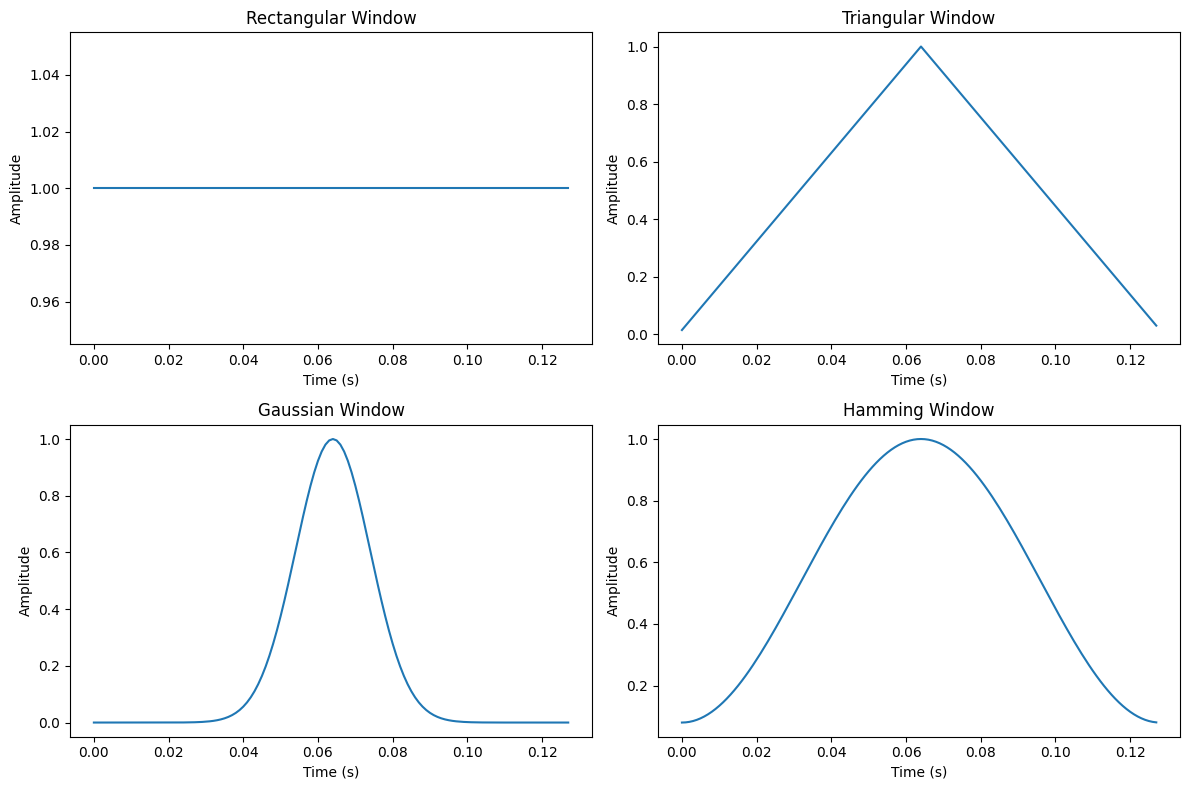

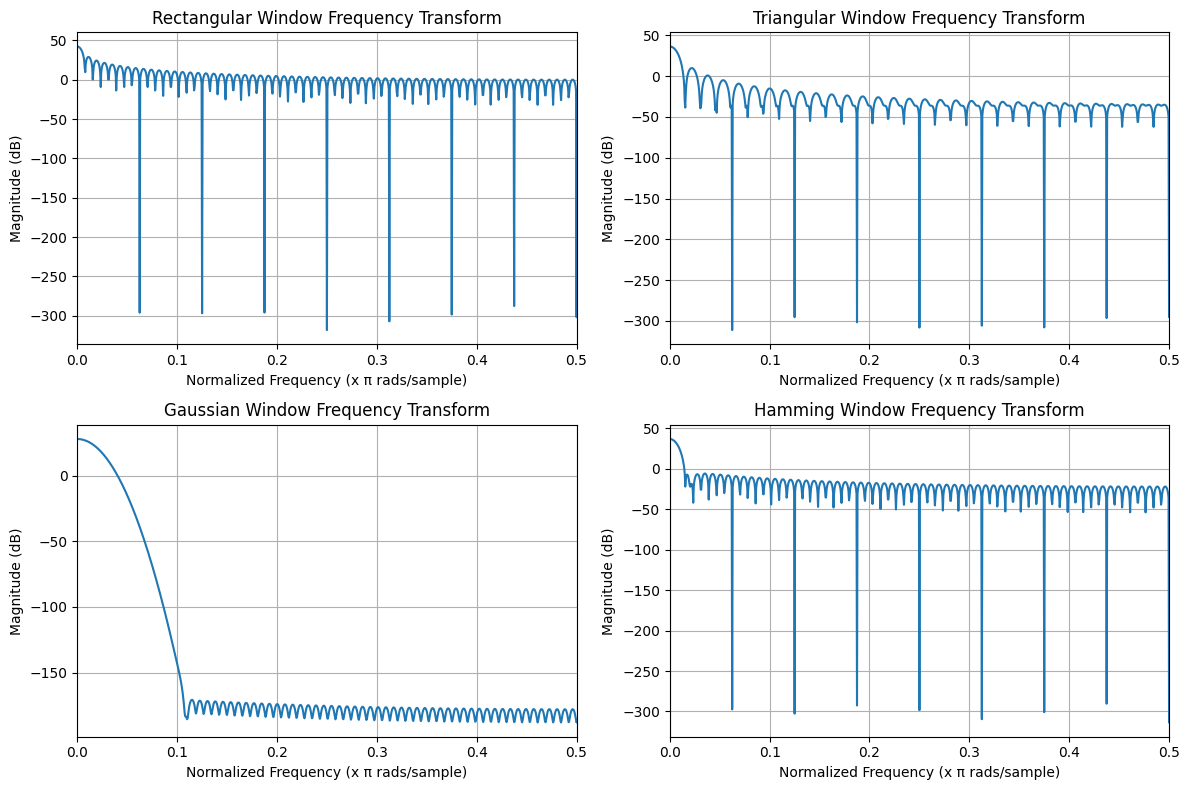

In [2]:
#%% part b
L = 128
fs = 1000  # Hz
std = 10 # for gaussian

def normalized_frequency_axis(N):
    return np.arange(N) / N
    
rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

t = np.arange(0, L) / fs

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(t, rectangular_window)
plt.title('Rectangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t, triangular_window)
plt.title('Triangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.plot(t, gauss_window)
plt.title('Gaussian Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(t, hamming_window)
plt.title('Hamming Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

print("==========================================================================================================================================")

N = len(x_t)
plt.figure(figsize=(12, 8))
cnt = 1
names = ["Rectangular", "Triangular", "Gaussian", "Hamming"]
for i in [rectangular_window, triangular_window, gauss_window, hamming_window]:
    X = np.fft.fft(i, N)
    X_mag = np.abs(X)
    
    X_dB = 20 * np.log10(X_mag)
    
    freq_axis = normalized_frequency_axis(N)
    
    plt.subplot(2, 2, cnt)
    plt.plot(freq_axis, X_dB)
    plt.title('{} Window Frequency Transform'.format(names[cnt-1]))
    plt.xlabel('Normalized Frequency (x π rads/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.xlim([0, freq_axis[1000]])
    cnt += 1
    
plt.tight_layout()
plt.show()

Subsequently, I employ the Short-Time Fourier Transform (STFT) method to conduct a time-frequency analysis of the signal.

##### Part c

I compute the spectrogram by applying four distinct windows (rectangular, triangular, Gaussian, and Hamming) and then proceed to compare the outcomes. Below is the MATLAB code for generating and visualizing the spectrograms:

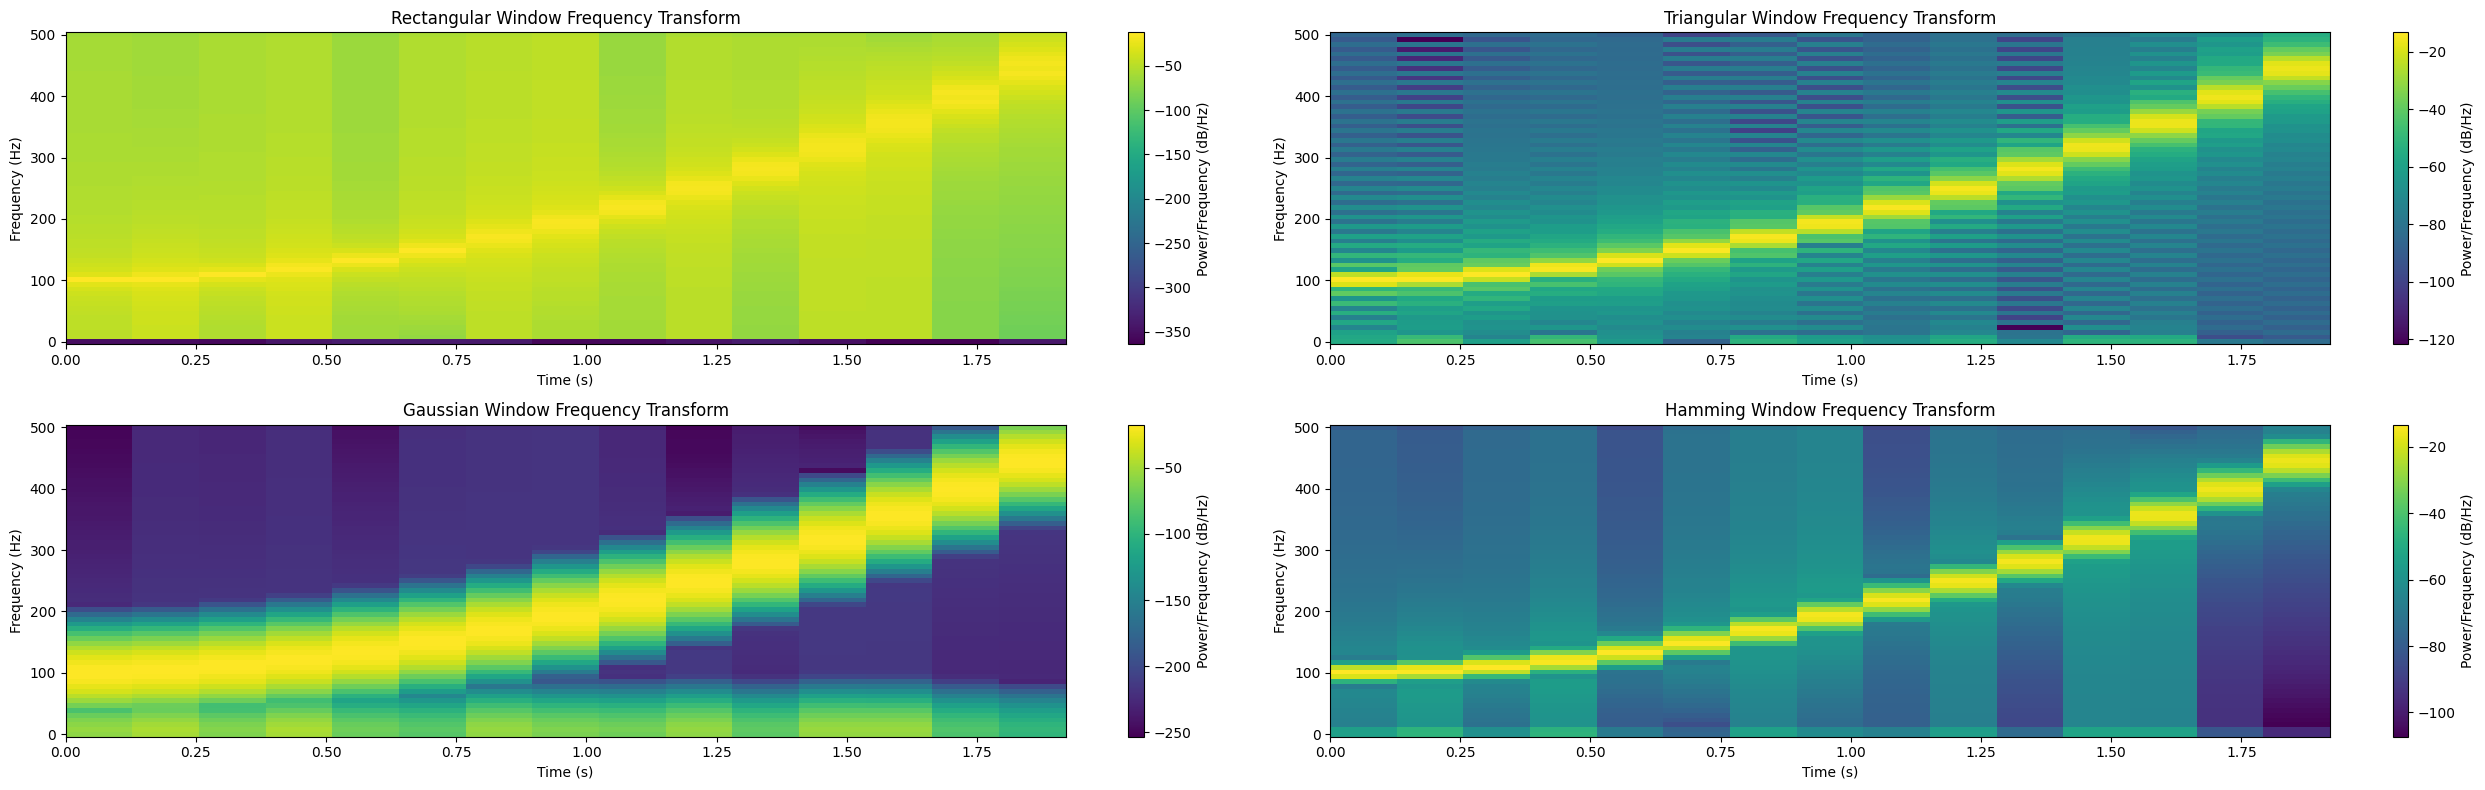

In [3]:
#%% part c
noverlap = 0
NFFT = L

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Rectangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 2)
f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Triangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 3)
f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Gaussian Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 4)
f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Hamming Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.tight_layout()
plt.show()

Impact of Window Functions

The choice of a window function exerts a profound influence on the spectrogram. Here's how each window function affects the analysis:

- **Rectangular Window**: The rectangular window exhibits high sidelobes in the frequency domain, leading to spectral leakage. It offers poor frequency resolution but excels in time localization.

- **Triangular Window**: The triangular window features a smoother transition from the main lobe to the sidelobes, effectively reducing spectral leakage compared to the rectangular window. It strikes a balance between frequency resolution and time localization.

- **Gaussian Window**: The Gaussian window further mitigates sidelobes and spectral leakage, resulting in improved frequency resolution. However, it widens the main lobe in the time domain.

- **Hamming Window**: The Hamming window minimizes sidelobes and spectral leakage while maintaining reasonable time localization. It serves as a favorable compromise between frequency resolution and time localization.

##### Part d

I explore the impact of varying the number of overlapping points (Noverlap) on the spectrogram when employing the triangular window.

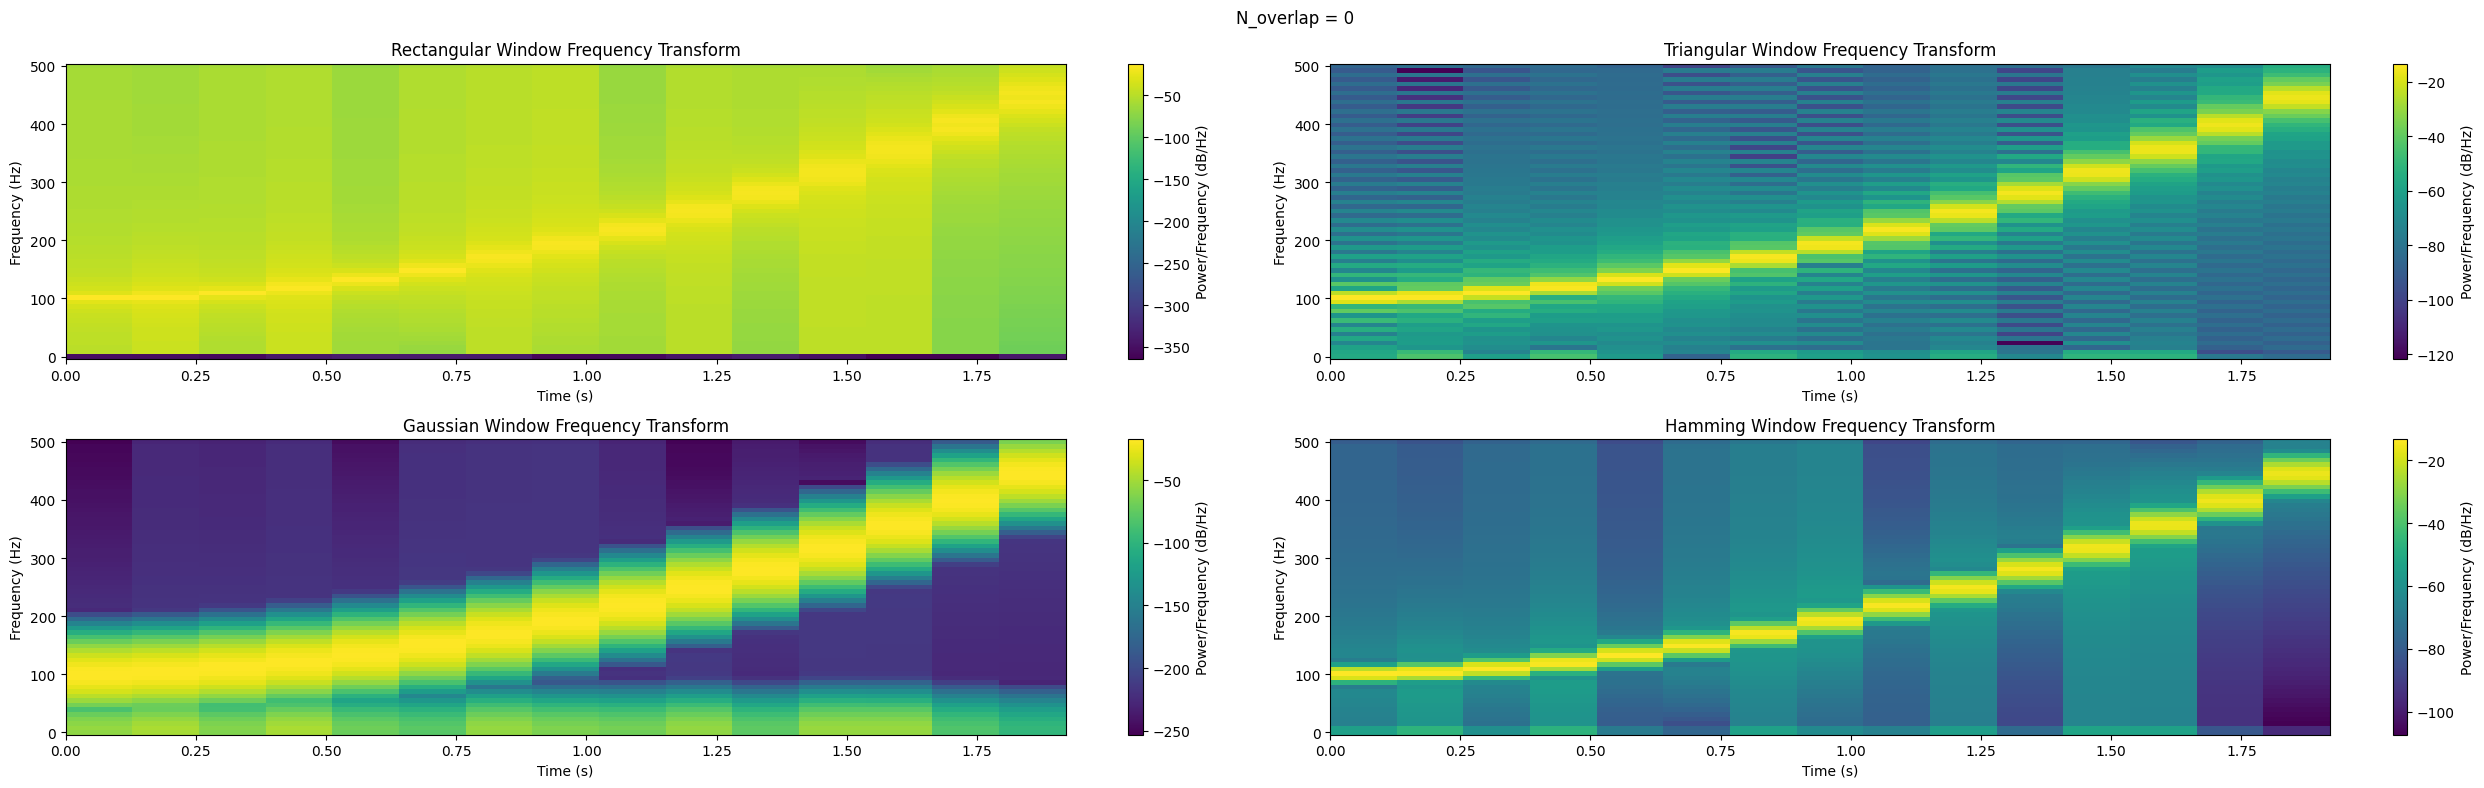

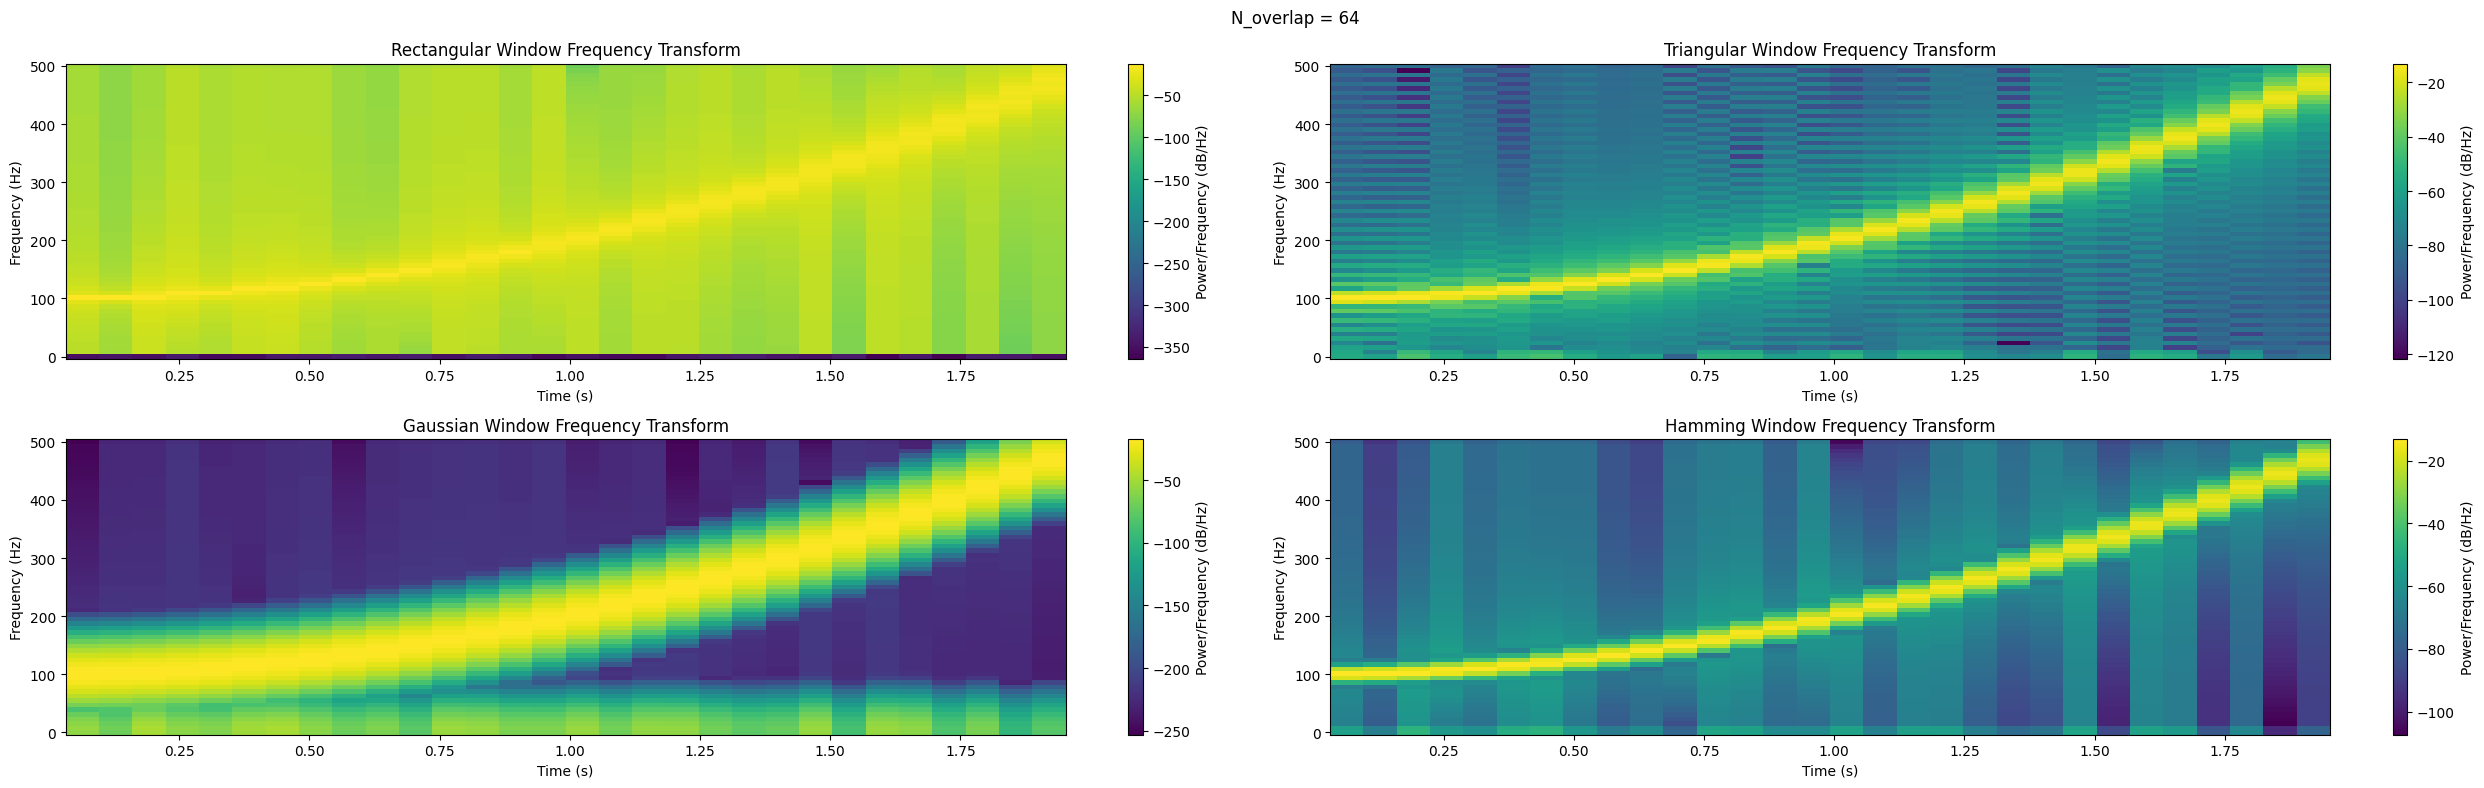

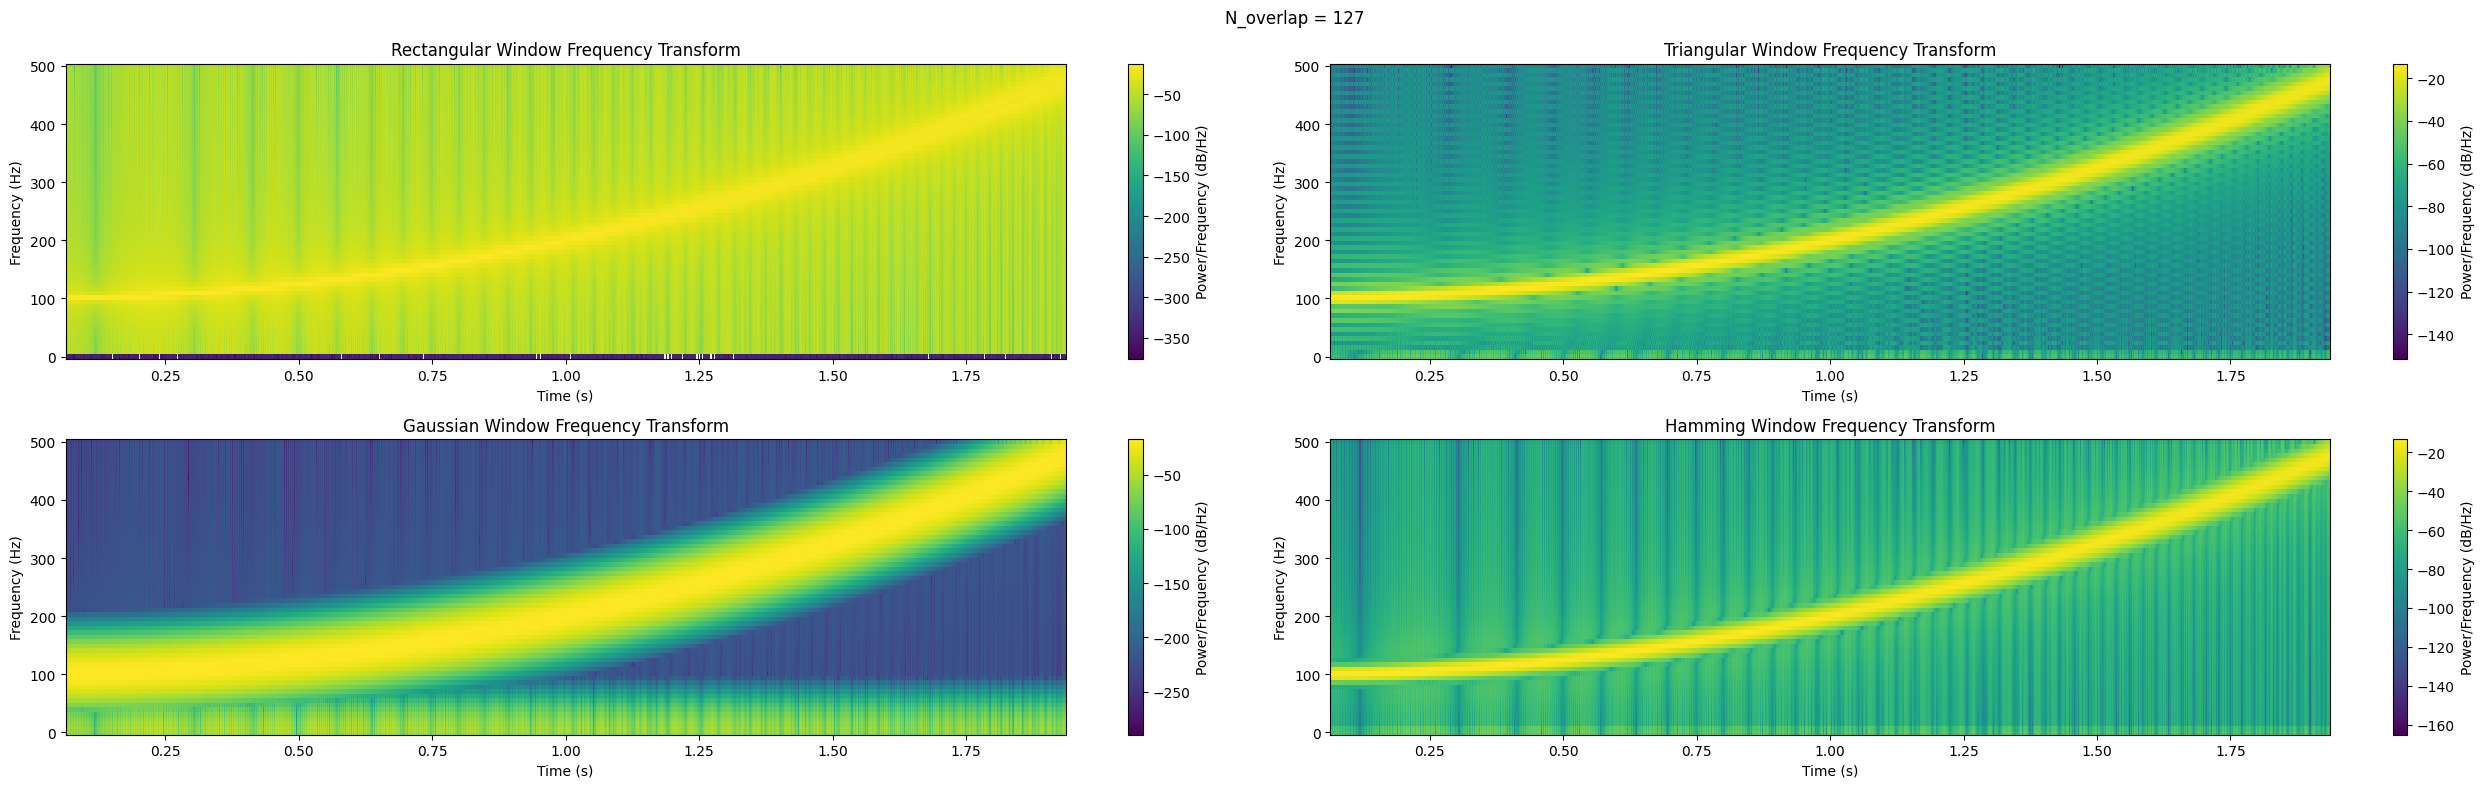

In [4]:
#%% part d
import warnings
warnings.filterwarnings("ignore")

noverlaps = [0, 64, 127]
NFFT = L

for noverlap in noverlaps:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.suptitle("N_overlap = {}".format(noverlap))
    plt.tight_layout()
    plt.show()
    print("==========================================================================================================================================")

Effect of Overlapping Points

The number of overlapping points (Noverlap) plays a crucial role in the trade-off between time resolution and frequency resolution within the spectrogram. Here's how modifying Noverlap impacts the analysis:

- **Noverlap = 0**: Zero overlap between adjacent windows yields the highest time resolution but reduces frequency resolution. Each window offers distinct information at individual time points but with diminished spectral content.

- **Noverlap = 64**: A moderate overlap strikes a balance between time and frequency resolution. Overlapping windows enhance frequency information while maintaining reasonable time localization.

- **Noverlap = 127**: Maximum overlap between windows results in the finest frequency resolution but sacrifices time resolution. Spectral information is well-preserved, but time localization is diminished.

##### Part e

I examine the influence of altering the window length on the spectrogram while keeping Noverlap fixed at L-1.

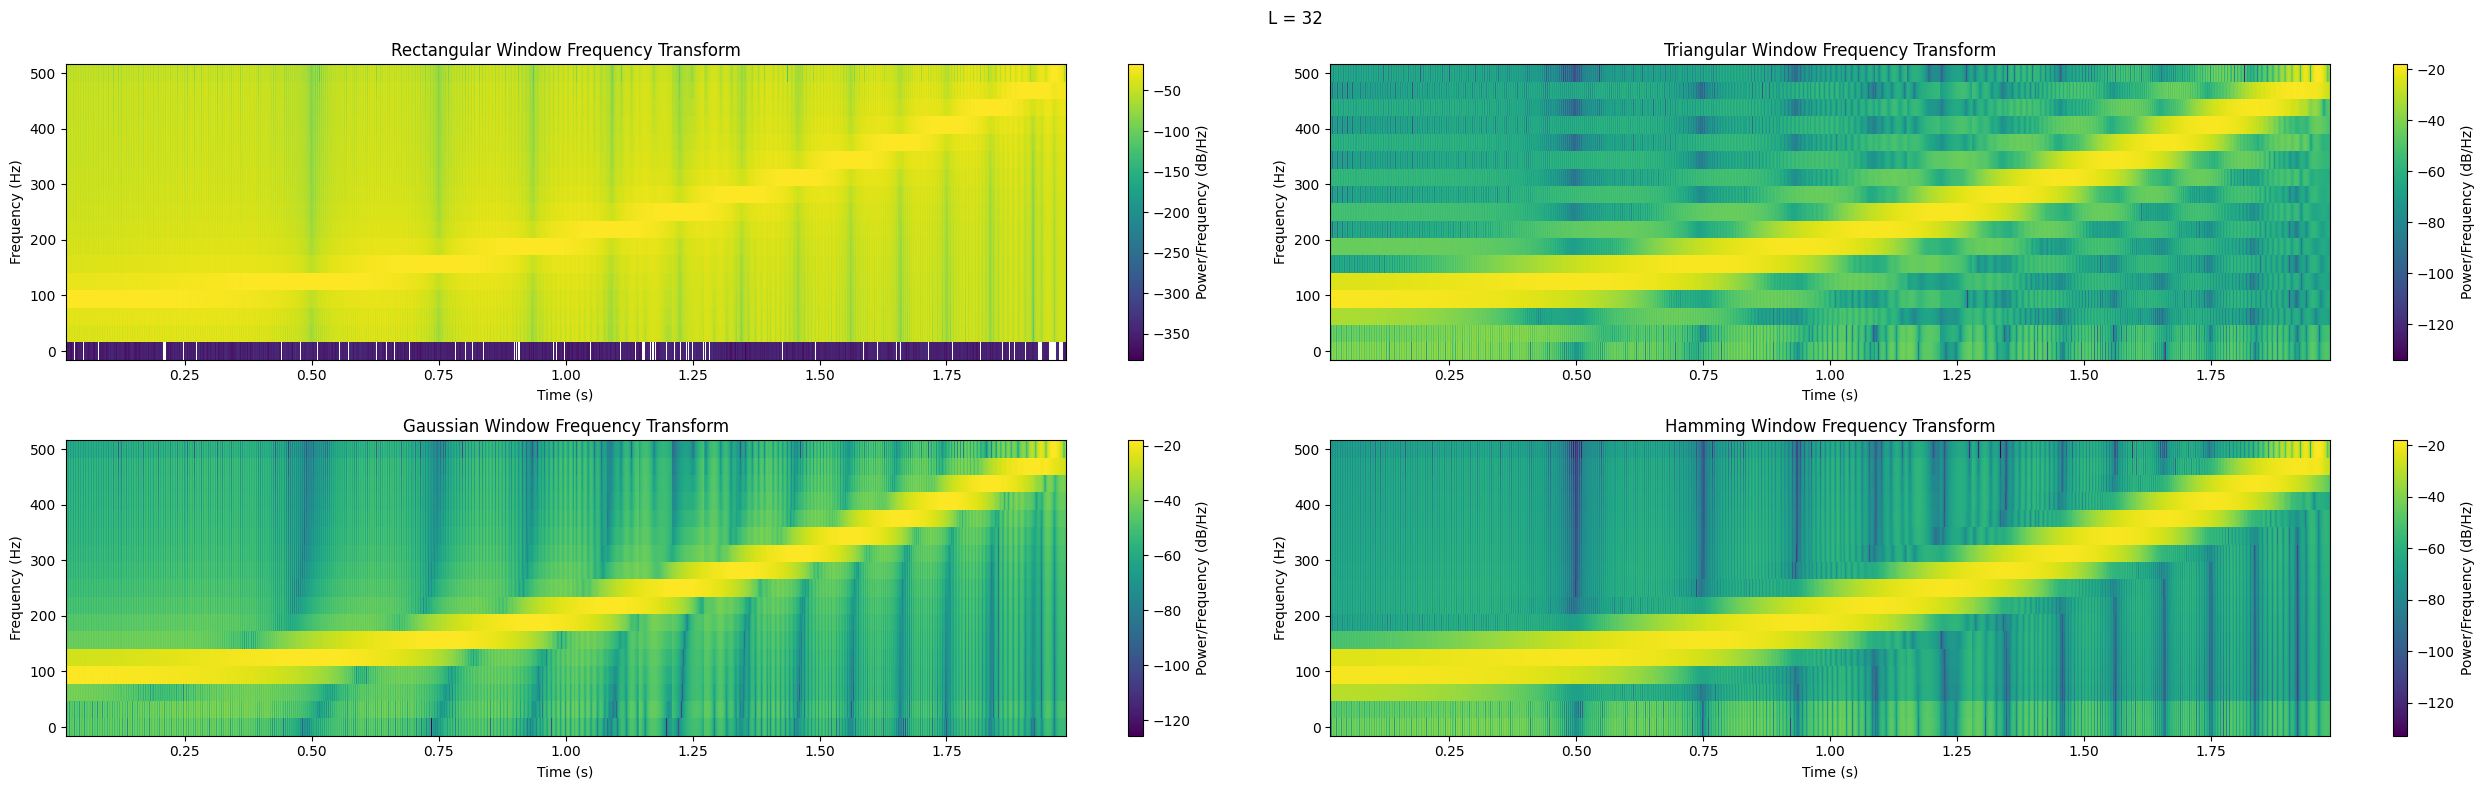

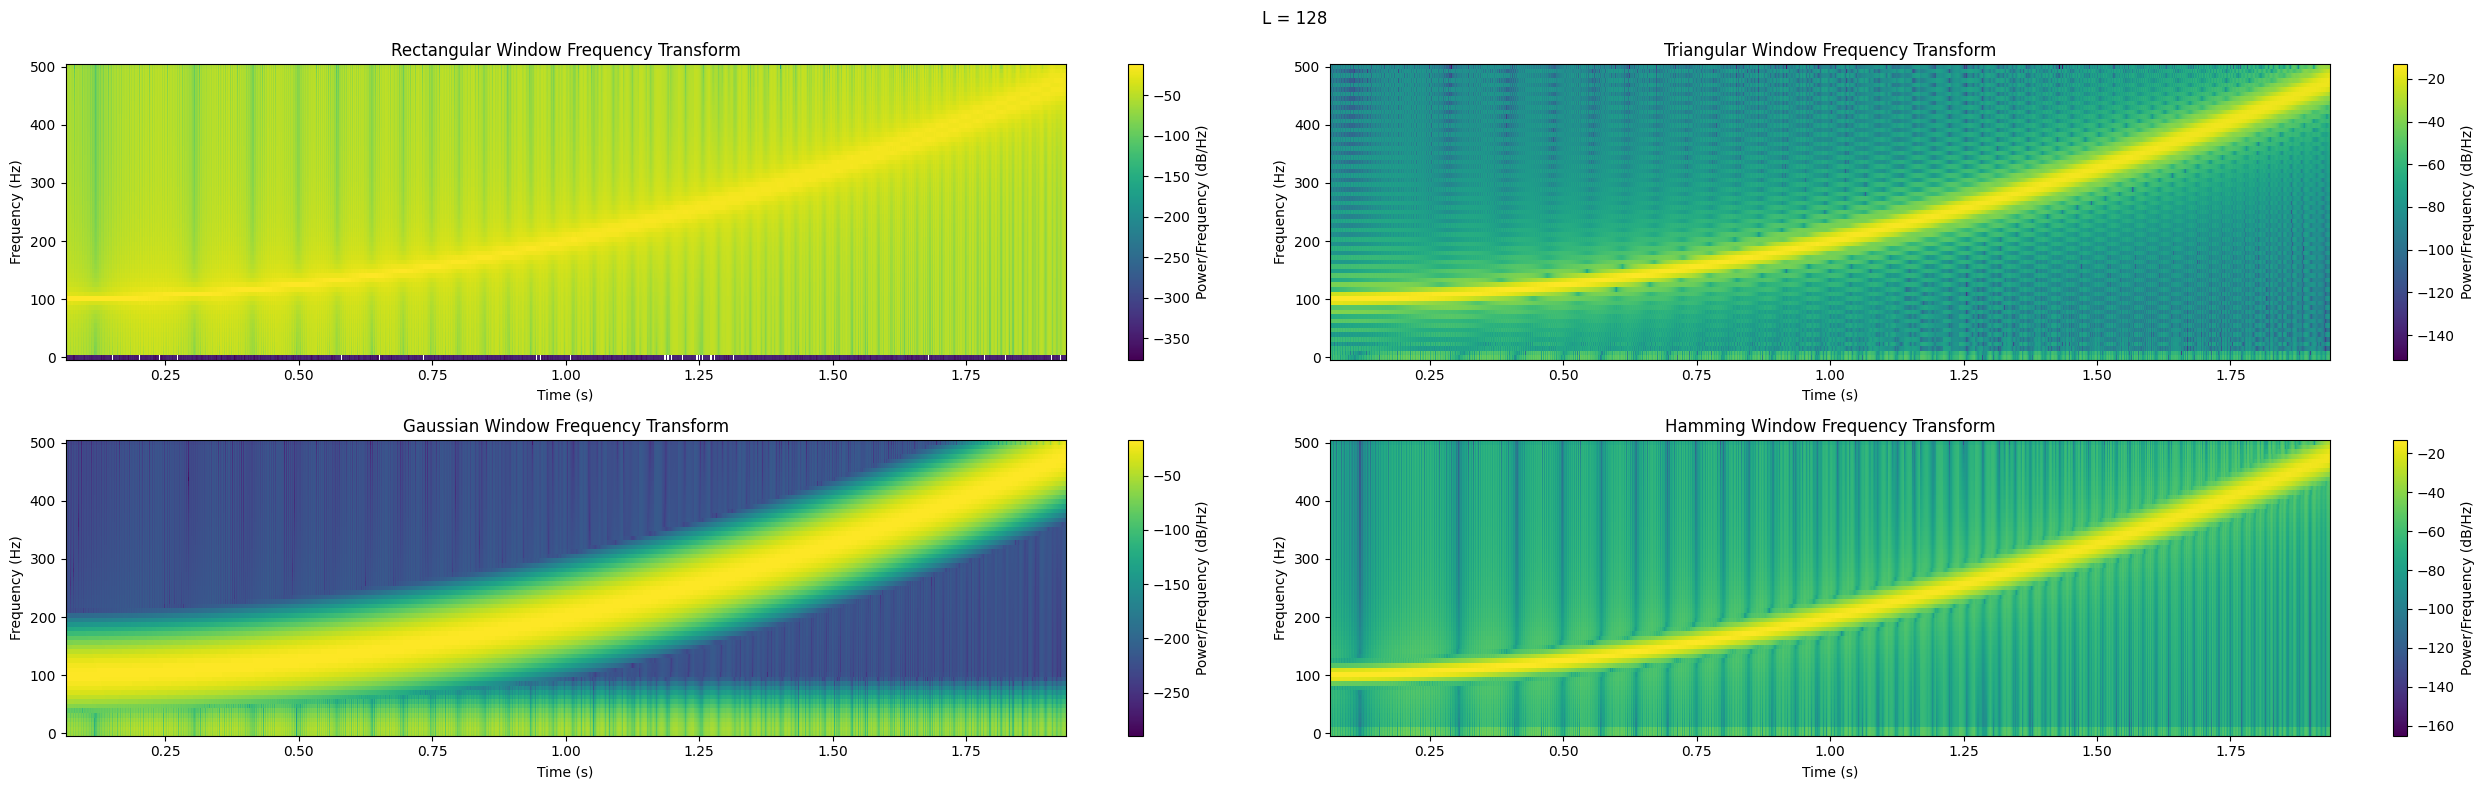

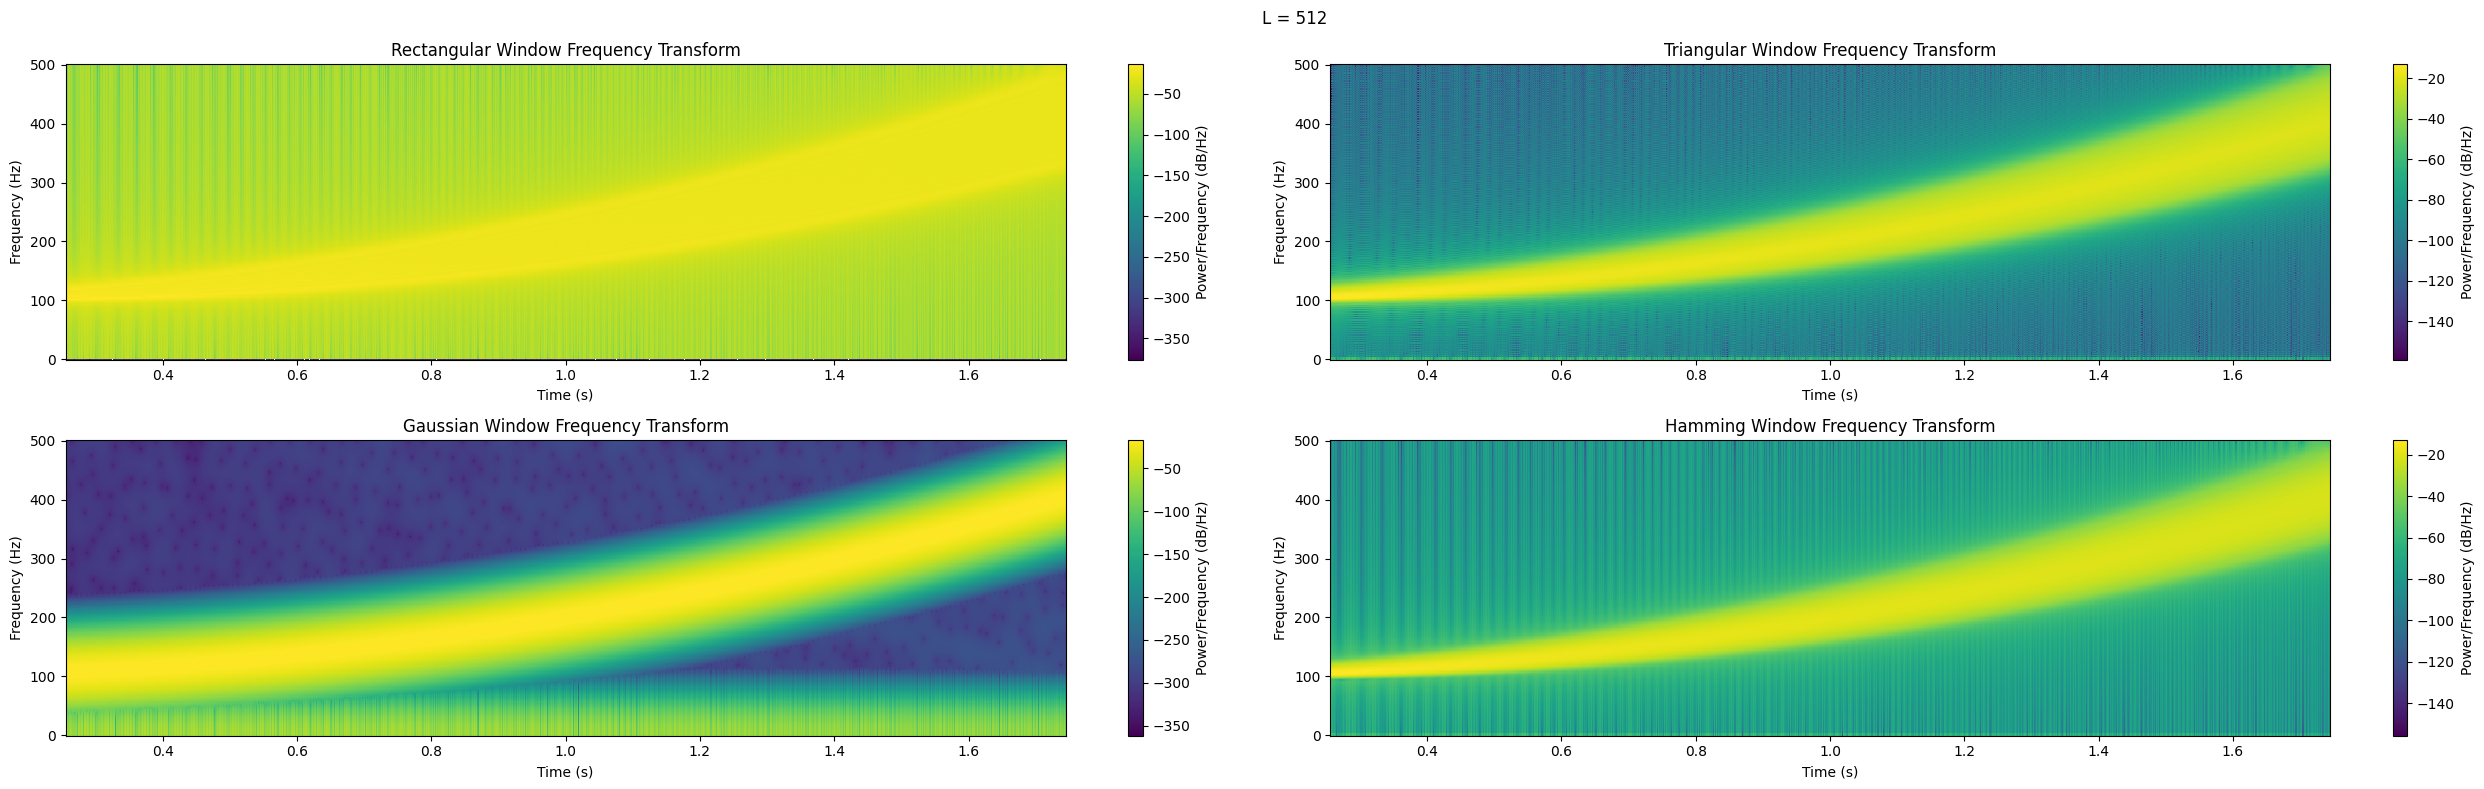

In [5]:
#%% part e
Ls = [32, 128, 512]

for L in Ls:
    noverlap = L - 1
    NFFT = L
    rectangular_window = get_window('boxcar', L)
    triangular_window = get_window('triang', L)
    gauss_window = get_window(('gaussian', std), L)
    hamming_window = get_window('hamming', L)
    
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.suptitle("L = {}".format(L))
    plt.tight_layout()
    plt.show()
    print("==========================================================================================================================================")

Effect of Window Length

Modifying the window length significantly impacts the time and frequency resolution of the spectrogram. Here's how varying window lengths affect the analysis:

- **Window Length = 32**: Shorter windows yield improved time resolution but reduced frequency resolution. This enables the detection of rapid changes in the signal's frequency but limits the ability to distinguish closely spaced frequency components.

- **Window Length = 128**: A medium-length window strikes a balance between time and frequency resolution, offering a reasonable compromise. This makes it a commonly chosen option for general analysis.

- **Window Length = 512**: Longer windows enhance frequency resolution but sacrifice time resolution. They are valuable for analyzing signals with fine frequency details but may overlook rapid changes in the signal's characteristics.

##### Part f

I examine how varying the number of Discrete Fourier Transform (DFT) points (nfft) impacts the spectrogram while maintaining a constant window length and fixed overlapping points.

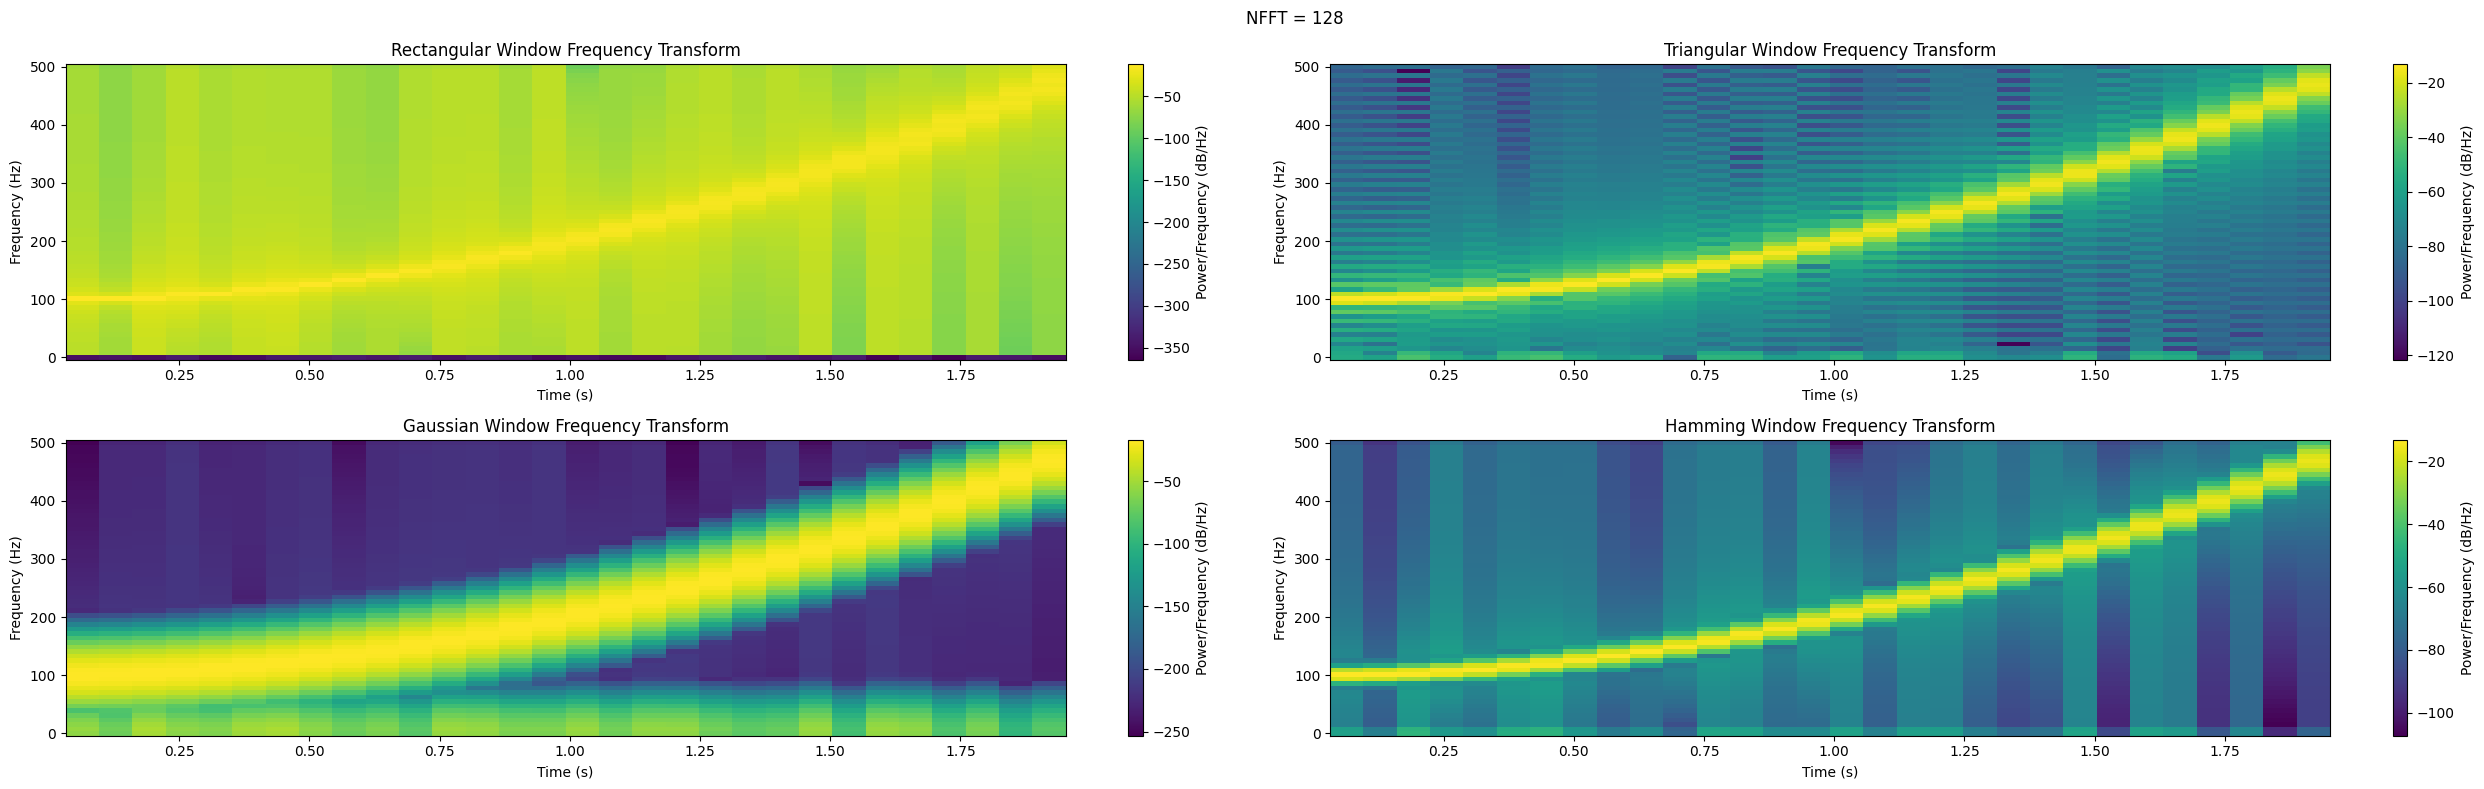

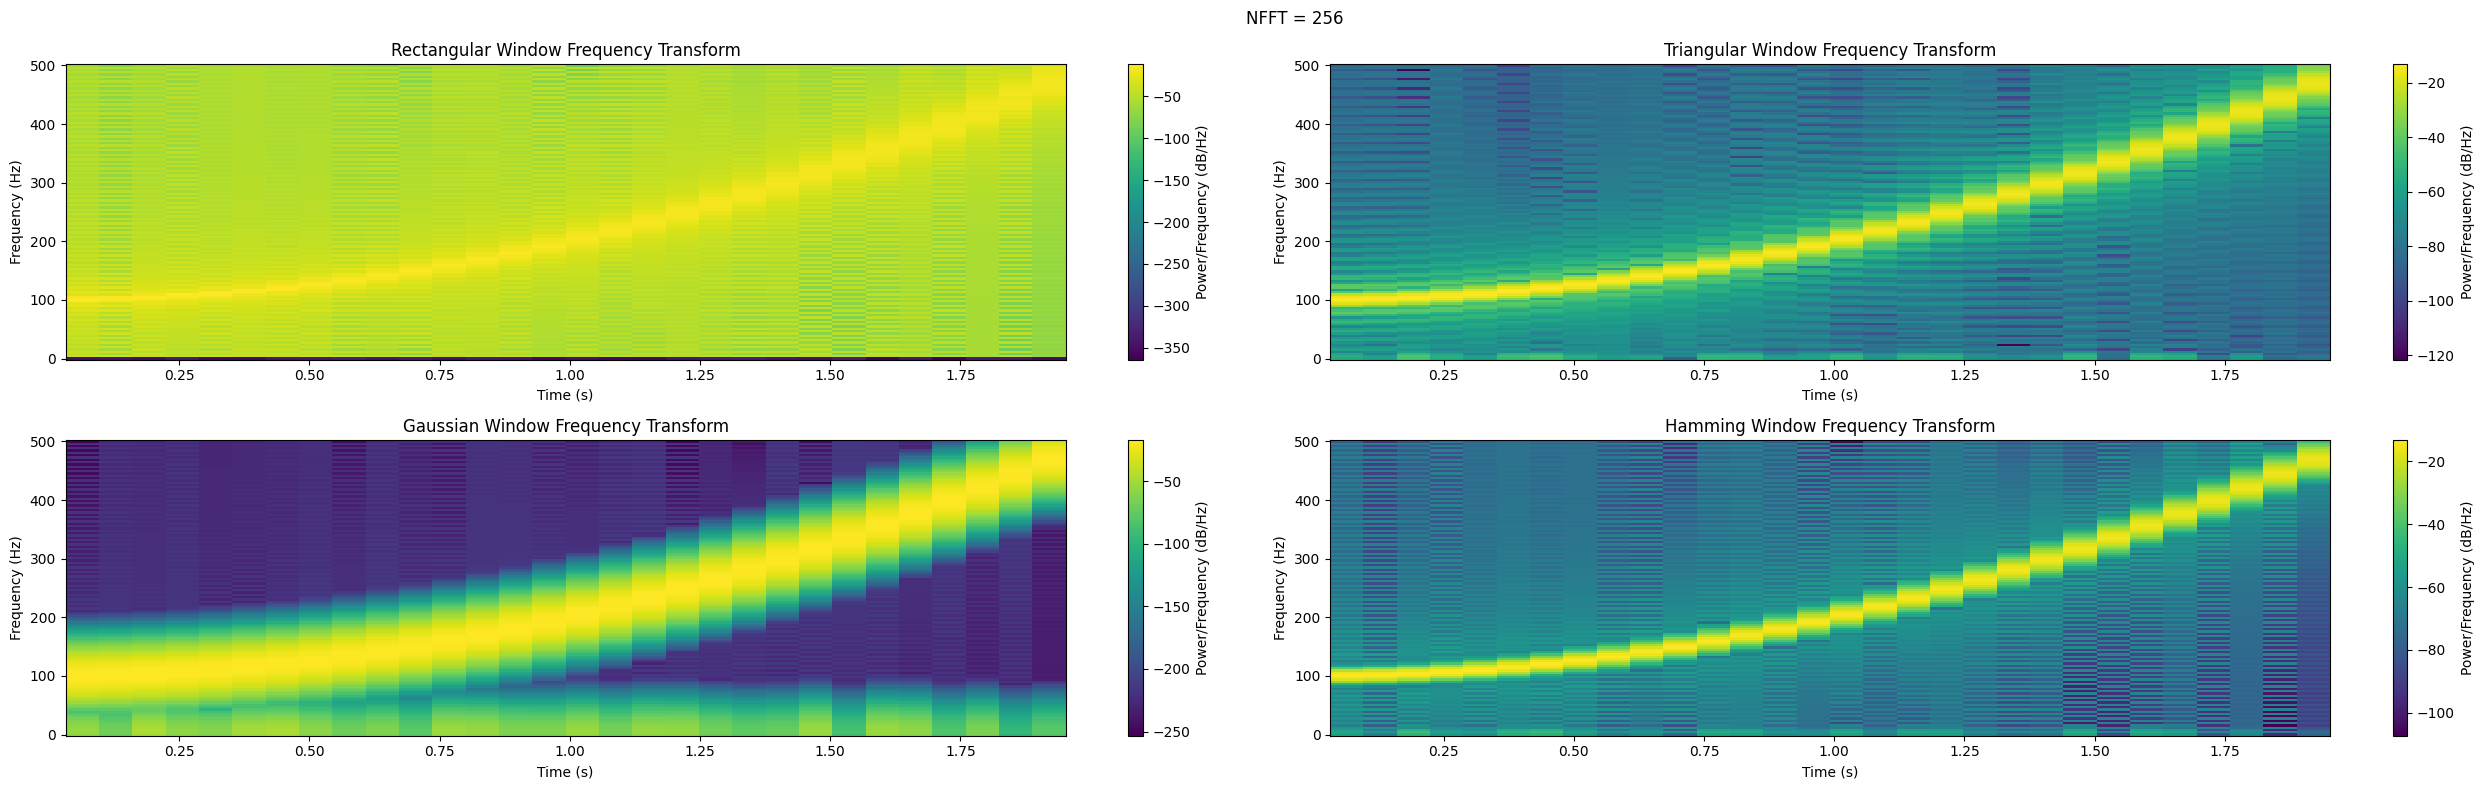

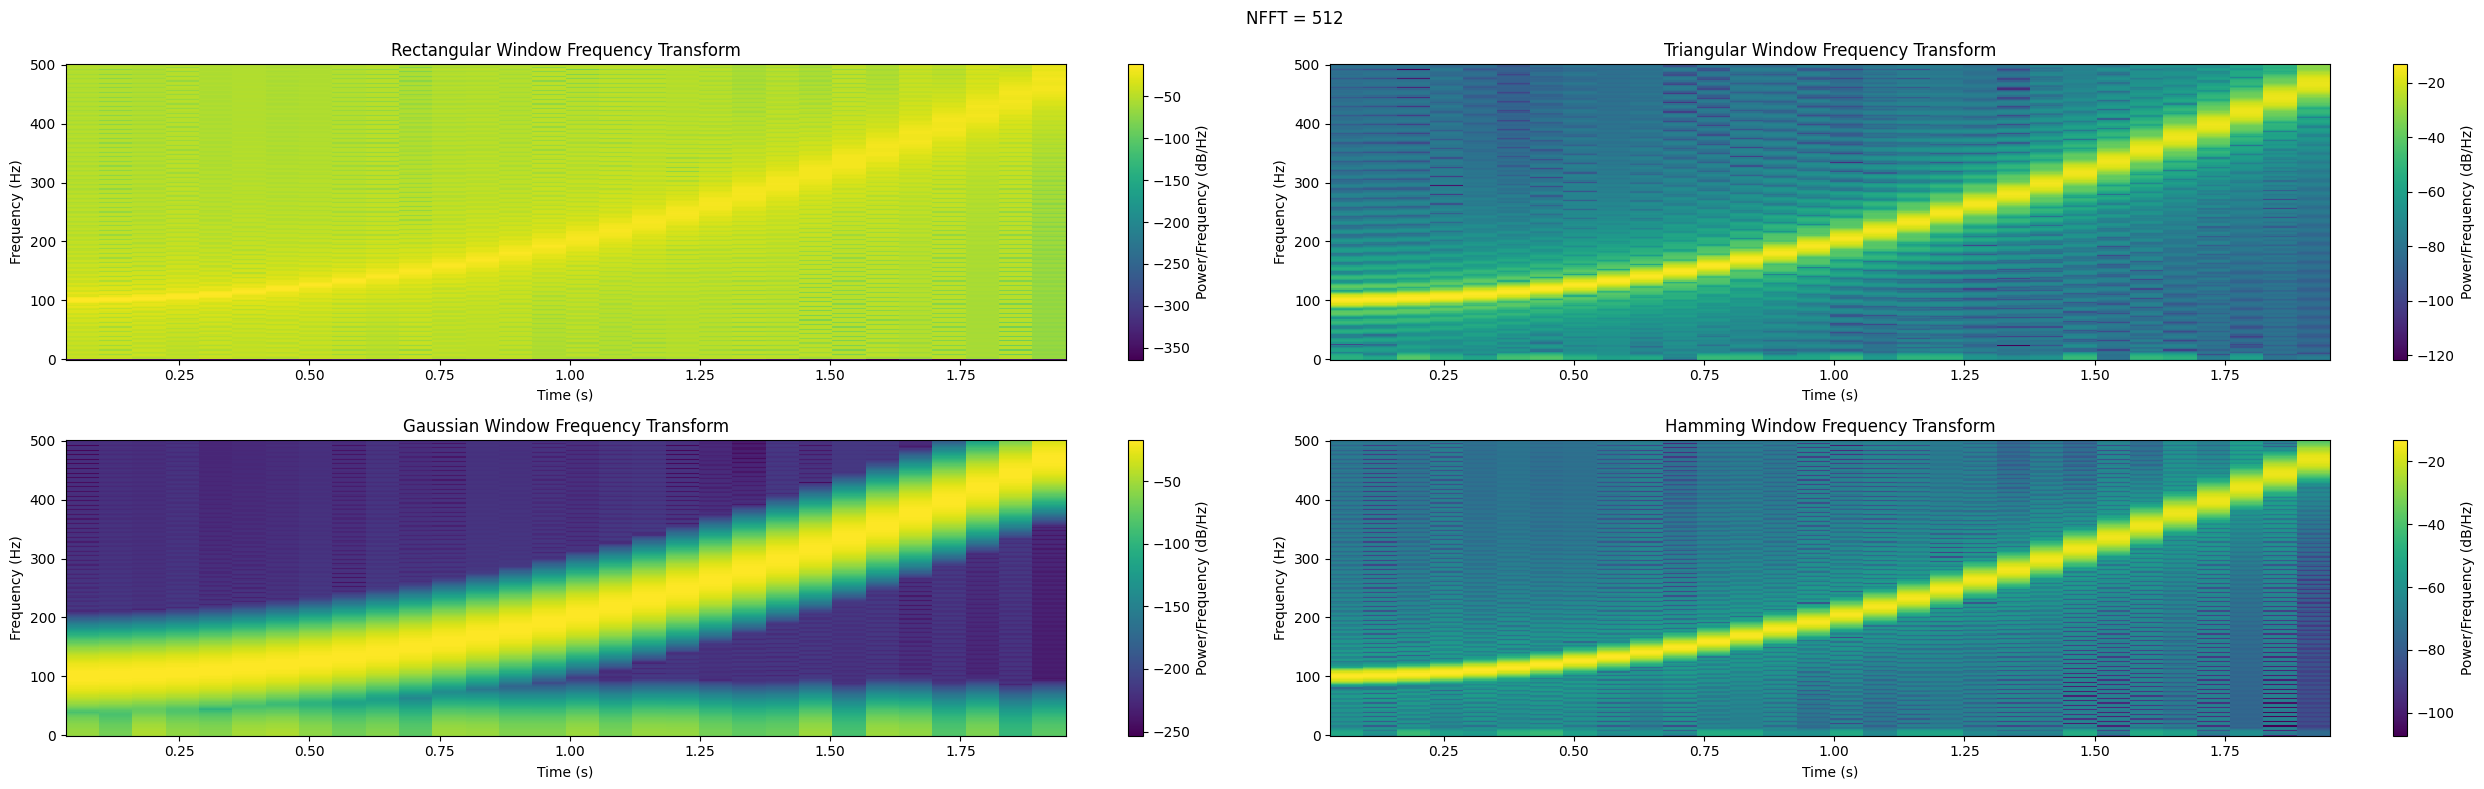

In [6]:
#%% part f
L = 128
NFFTs = [L, 2*L, 4*L]
noverlap = L/2
rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

for NFFT in NFFTs:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    
    plt.suptitle("NFFT = {}".format(NFFT))
    plt.tight_layout()
    plt.show()
    print("==========================================================================================================================================")

Effect of DFT Points (NFFT)

The choice of the number of Discrete Fourier Transform (DFT) points (NFFT) directly affects the frequency resolution of the spectrogram. Here's how different nfft values impact the analysis:

- **NFFT = 128** : Utilizing a lower number of DFT points results in diminished frequency resolution. The spectrogram exhibits larger frequency bins, making it challenging to differentiate closely spaced frequencies.

- **NFFT = 256** : Doubling the number of DFT points enhances frequency resolution. The spectrogram becomes more adept at distinguishing closely spaced frequency components, providing improved spectral information.

- **NFFT = 512** : Further increasing the number of DFT points heightens frequency resolution. The spectrogram becomes highly proficient in resolving fine frequency details, making it valuable for analyzing signals with closely spaced components.

---

##### Conclusion
In this section, I have delved into various signal processing techniques, encompassing signal generation, window functions, and the application of time-frequency analysis through the Short-Time Fourier Transform (STFT).

I have observed how different aspects such as window functions, overlapping points, window length, and the number of DFT points can affect the time and frequency resolution of the spectrogram. It's noteworthy that the selection of window functions and parameter values wields substantial influence on the analytical results. Researchers should make these choices carefully, considering the unique characteristics of the signals under investigation and their specific analytical objectives.

---

#### Question 2
##### Part a

Within this section, I conduct an analysis of an EEG signal sampled at a rate of 256 Hz. The EEG signal undergoes processing via a range of techniques, encompassing time domain analysis, frequency domain analysis, low-pass filtering, downsampling, zero-padding, and the utilization of the Discrete Fourier Transform (DFT).

I commence by investigating the EEG signal in both the time domain and its frequency characteristics using a spectrogram.

Subsequently, I conduct a Fourier Transform of the EEG signal to scrutinize its frequency components.

I utilize the Short-Time Fourier Transform (STFT) on the EEG signal, employing a Hamming window with predefined parameters (Hamming Window, L = 128, Novelap = 64, NFFT = 128).

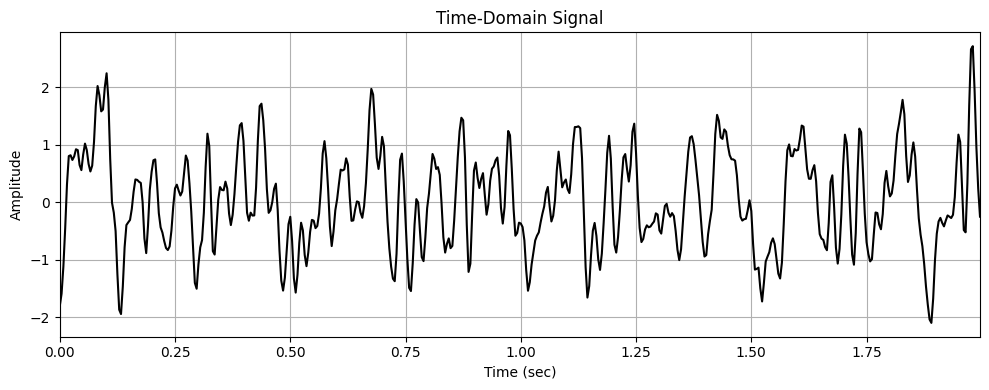

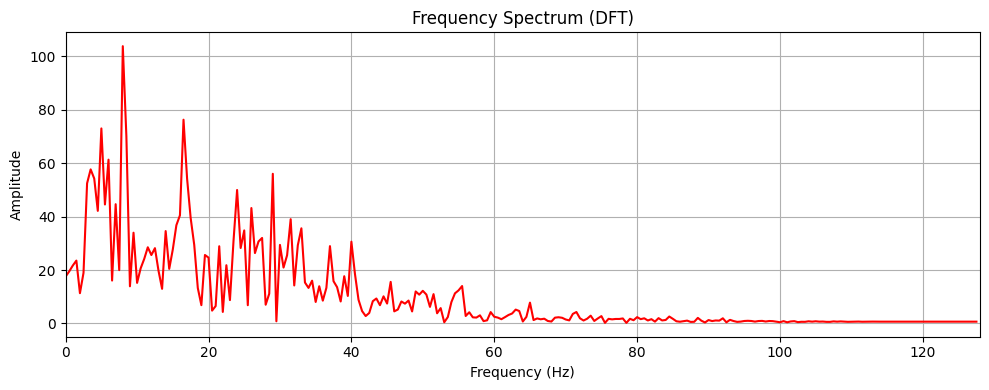

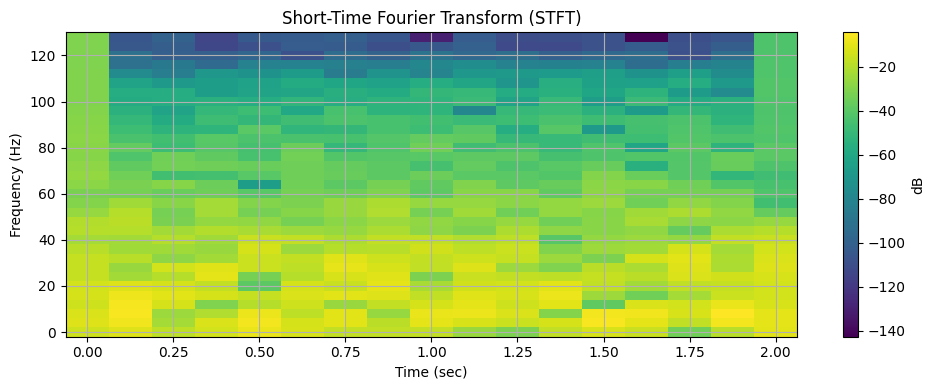

In [7]:
#%% Question 2
# part a
from scipy.io import loadmat
from scipy.fft import fft
from scipy.signal import stft

# Plot the time-domain signal
signal = loadmat('NewEEGSignal.mat')['NewEEGSignal'][0]
fs = 256 #Hz
t = np.arange(0, 512) / fs

plt.figure(figsize=(10, 4))
plt.plot(t, signal, 'k')
plt.title("Time-Domain Signal")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, t[-1])
plt.tight_layout()
plt.show()

# Plot the frequency spectrum (DFT)
dft = fft(signal)
n = len(signal)
freq = np.fft.fftfreq(n, 1/fs)
positive_freq_indices = np.where(freq >= 0)
plt.figure(figsize=(10, 4))
plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r')
plt.title("Frequency Spectrum (DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, fs/2)
plt.tight_layout()
plt.show()

# Plot the STFT
f, t, Zxx = stft(signal, fs=fs, nperseg=64)  # You can adjust nperseg for desired time and frequency resolution
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, 20 * np.log10(np.abs(Zxx)))
plt.title("Short-Time Fourier Transform (STFT)")
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="dB")
plt.grid(True)
plt.tight_layout()
plt.show()

In the time domain analysis, I examine the unprocessed EEG signal, while in the frequency domain analysis, I identify its distinct frequency components. The Short-Time Fourier Transform (STFT) furnishes a comprehensive time-frequency representation of the signal.

##### Part b

Within this section, I employ low-pass filtering on the EEG signal and subsequently downsample it.

The low-pass filtering is executed via the Butterworth filter, and downsampling is carried out according to a predefined factor. The resultant signal is denoted as EEG_ds.

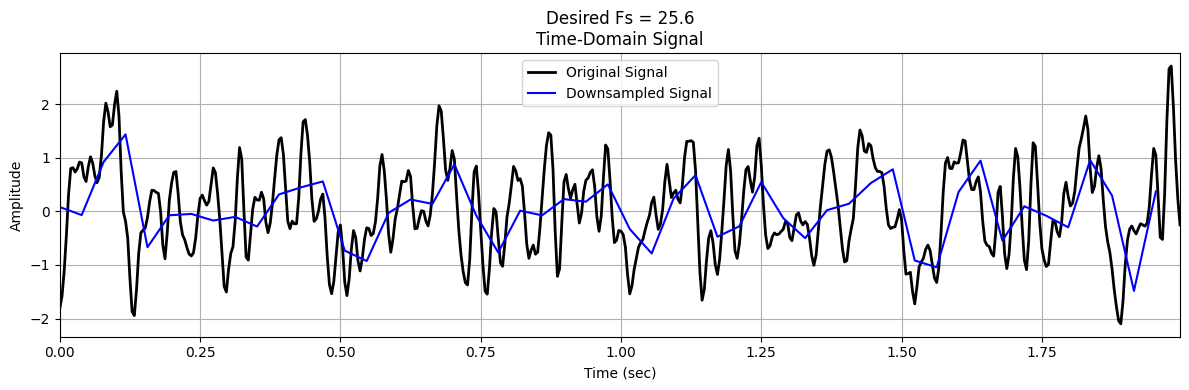

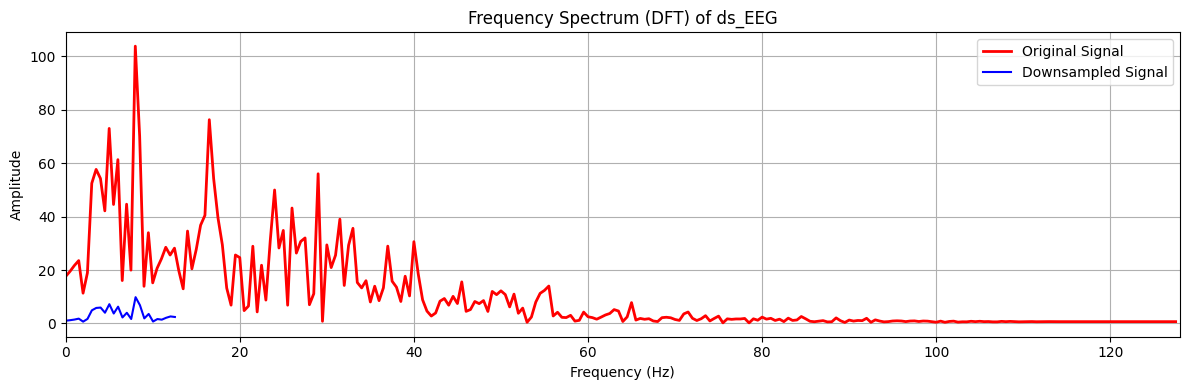

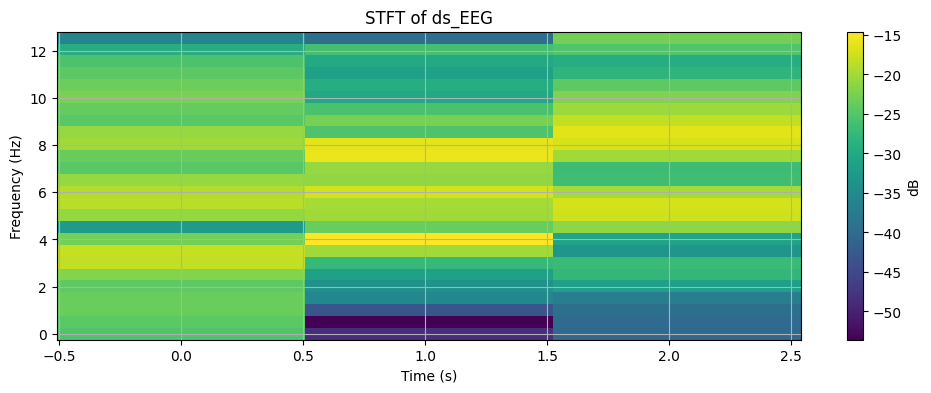

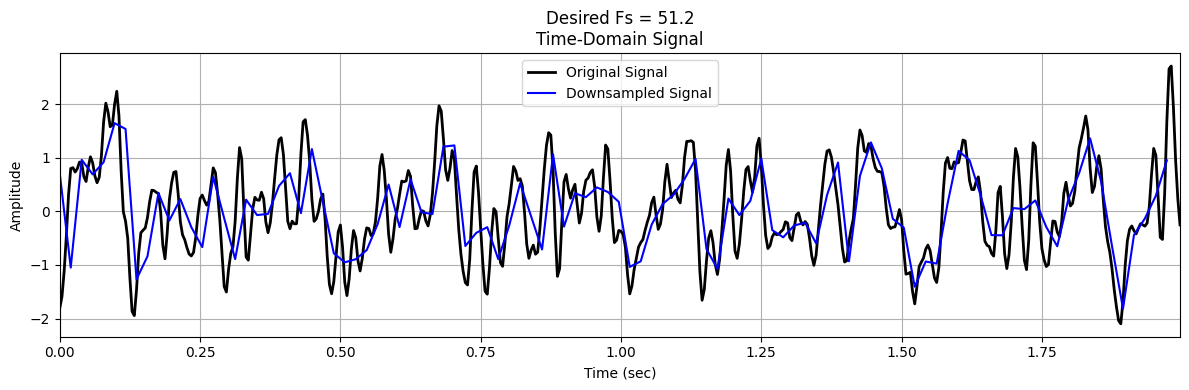

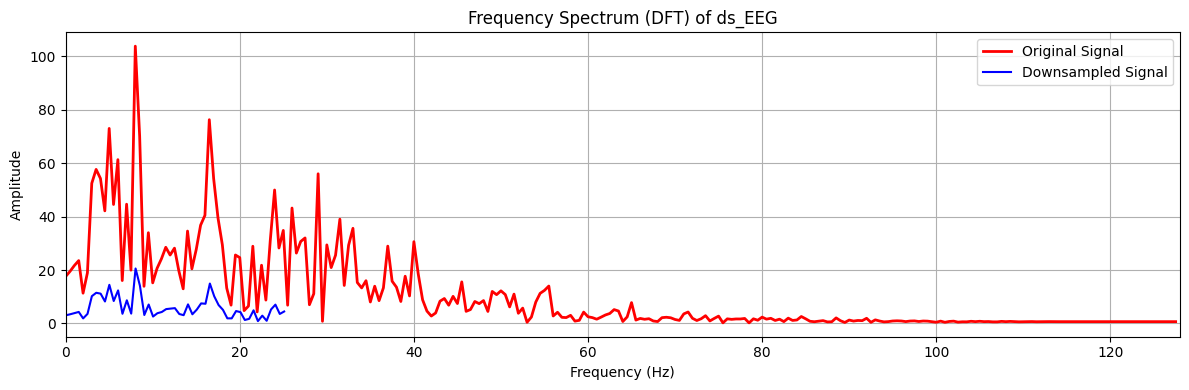

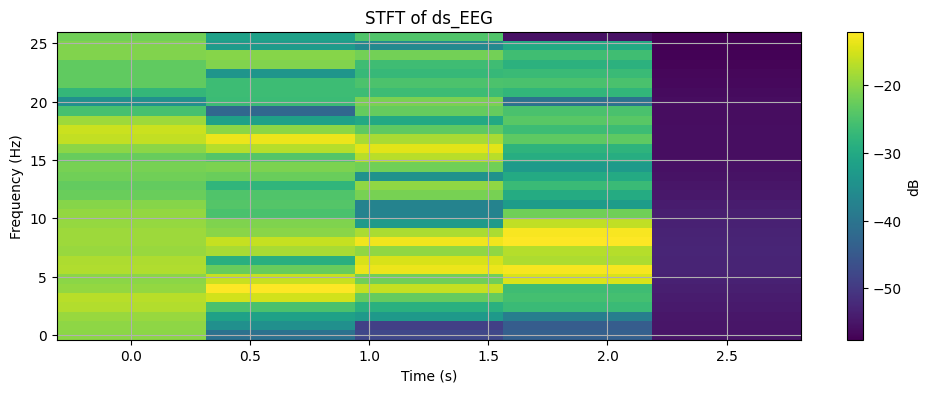

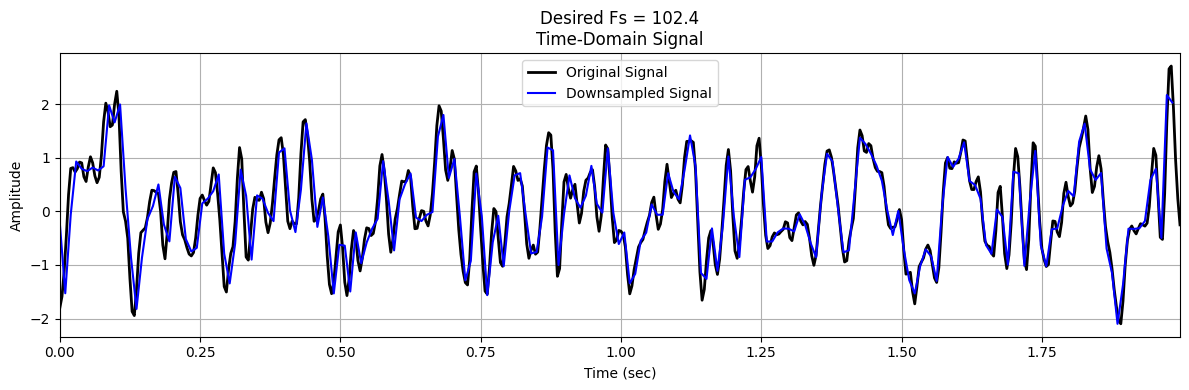

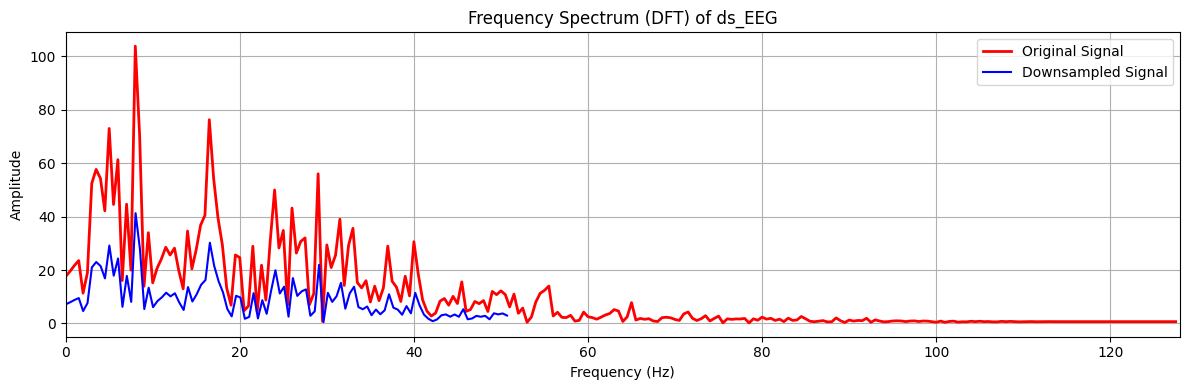

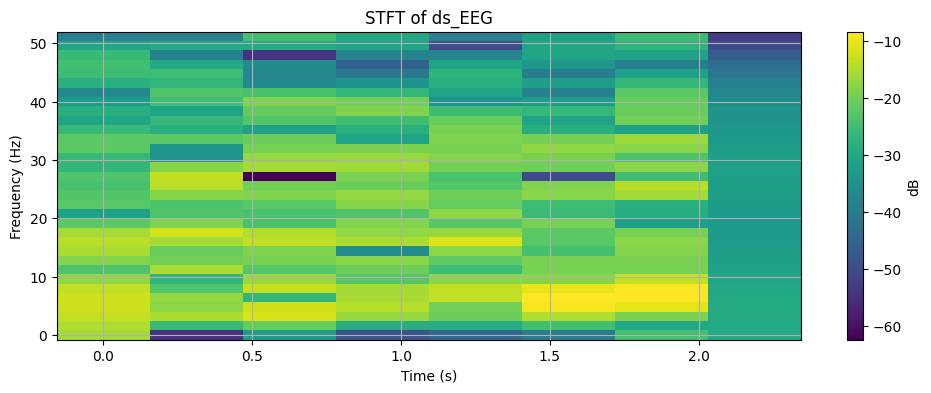

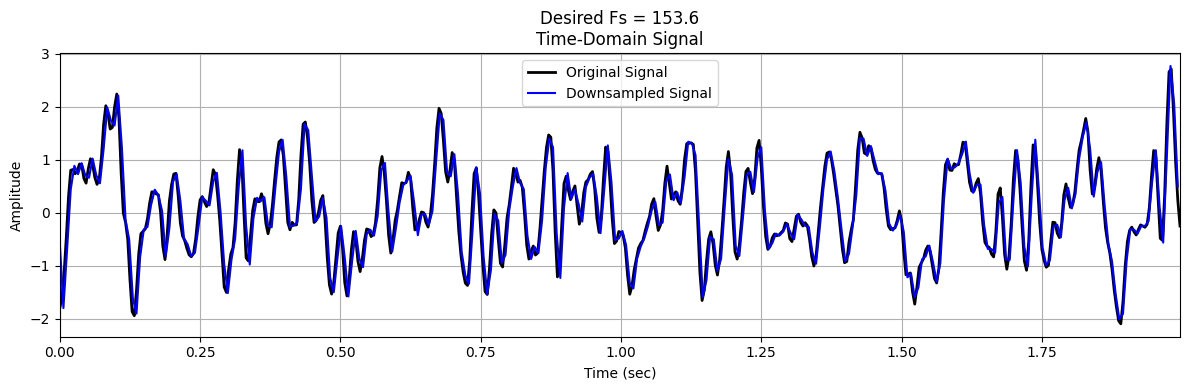

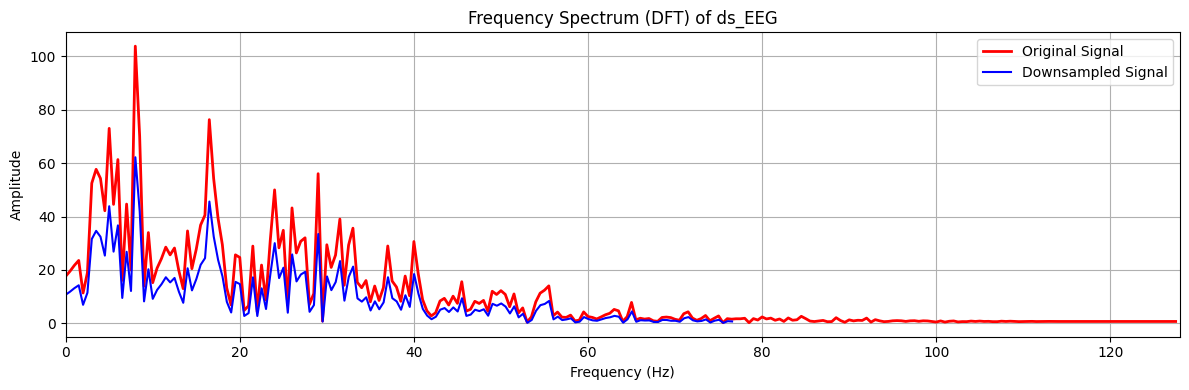

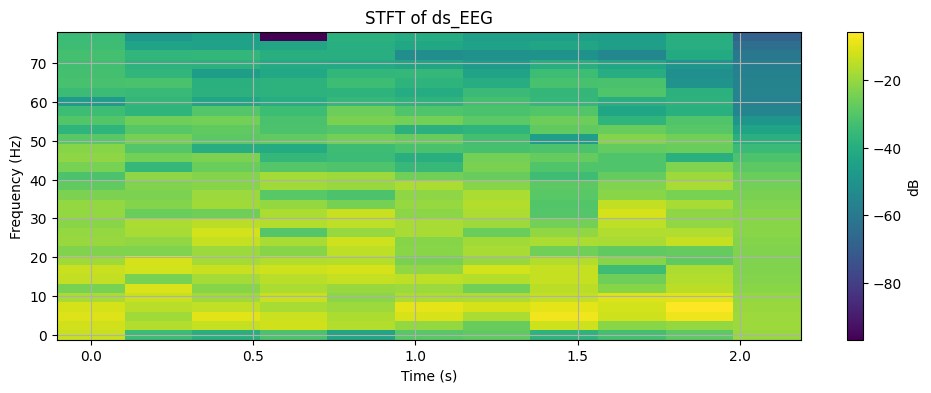

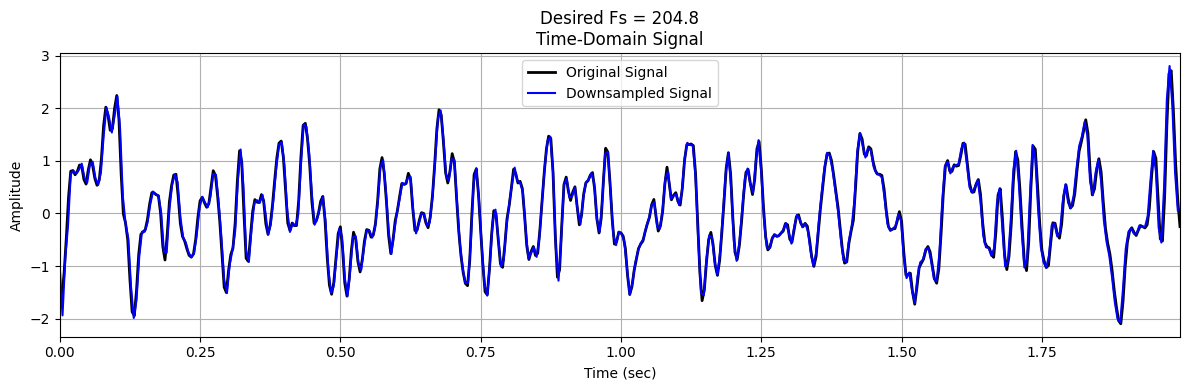

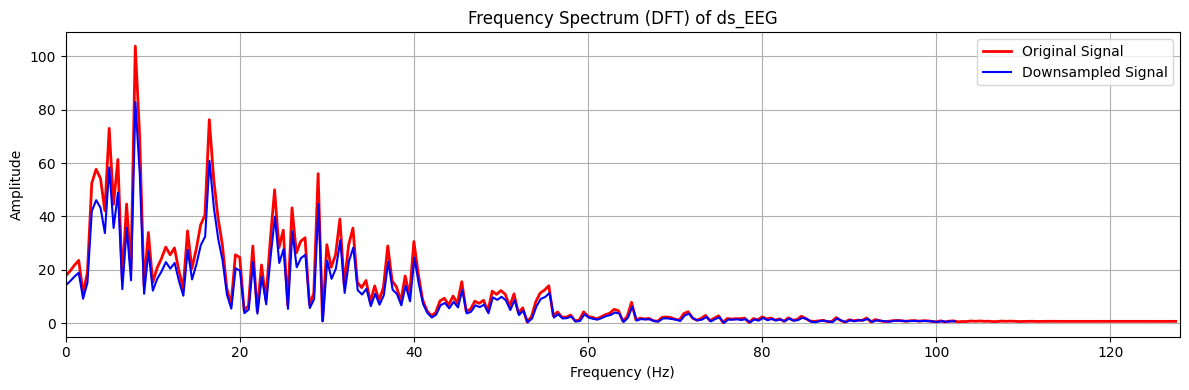

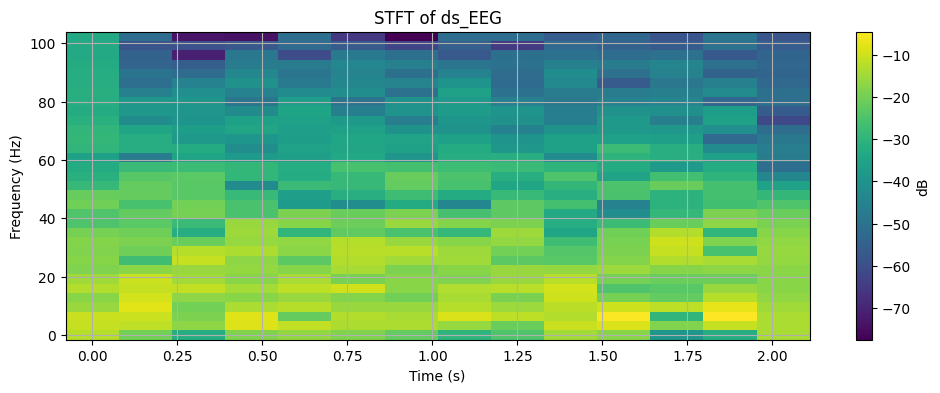

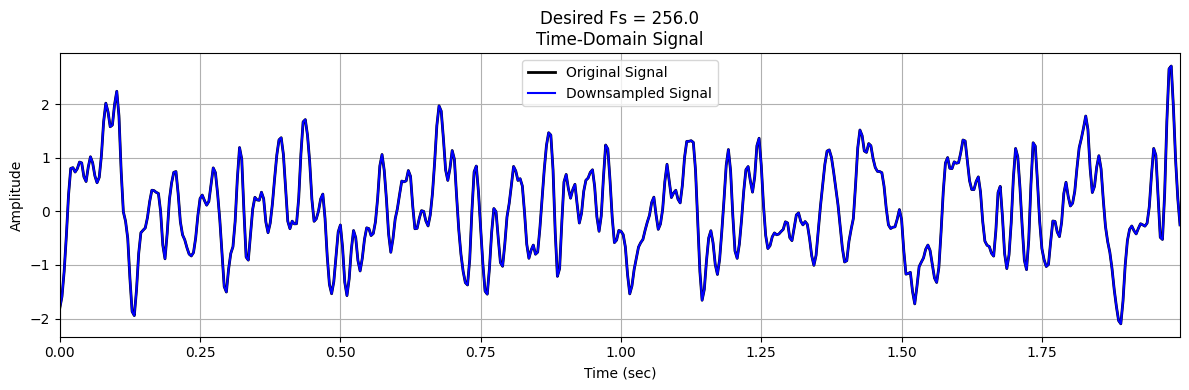

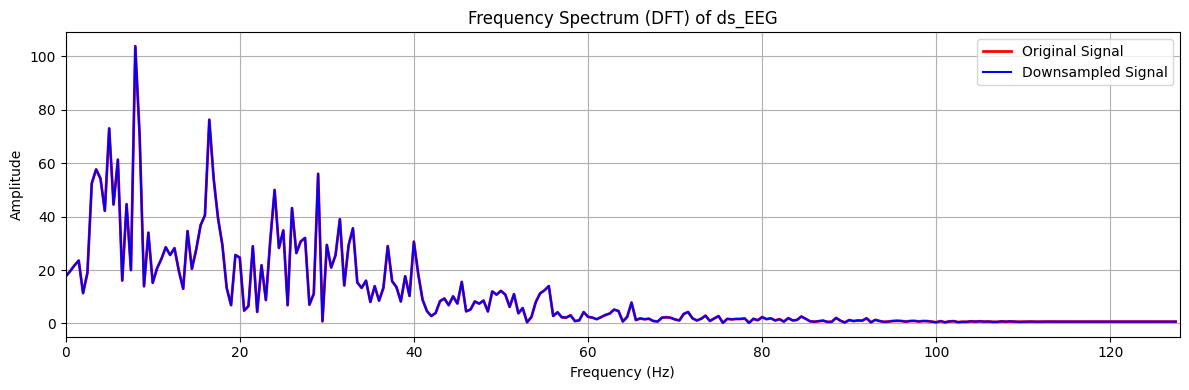

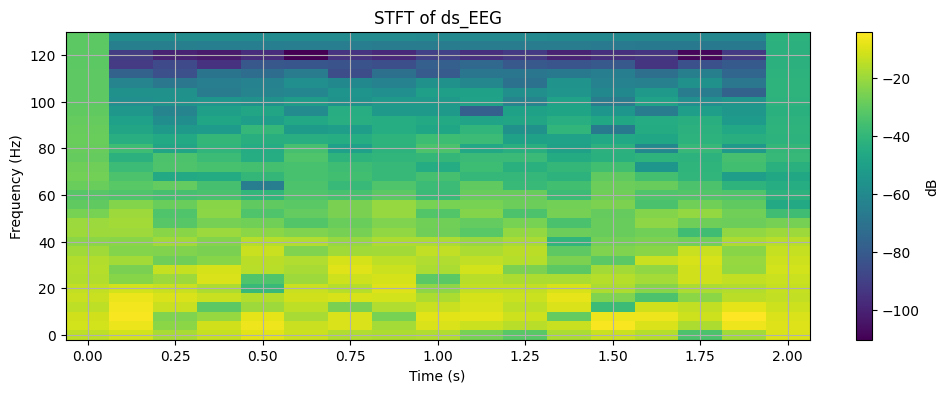

In [8]:
#%% part b
from scipy.signal import butter, lfilter, resample

M = [1, 2, 4, 6, 8, 10]
desireds_fs = np.array(M)*fs/10

for desired_fs in desireds_fs:
    # Define the desired lower sampling rate
    t = np.arange(0, 512) / fs
    
    # Step 1: Apply a low-pass filter
    # Design a Butterworth low-pass filter
    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')
    
    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal)
    
    # Step 2: Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)),)
    
    # Step 3: Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(12, 4))
    plt.plot(t, signal, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Desired Fs = {}".format(desired_fs) + "\nTime-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Frequency Spectrum (DFT) of ds_EEG
    plt.figure(figsize=(12, 4))
    dft = fft(signal)
    n = len(signal)
    freq = np.fft.fftfreq(n, 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Original Signal", lw=2)
    dft_ds_EEG = fft(downsampled_signal)
    freq_ds_EEG = np.fft.fftfreq(len(downsampled_signal), 1 / desired_fs)
    positive_freq_indices = np.where(freq_ds_EEG >= 0)
    
    plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), c='b', label="Downsampled Signal")
    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.show()
    
    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(12, 4))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.show()
    print("==========================================================================================================================================")

Let's break down and discuss the code's steps and objectives:

1. **Loop Over Different Downsampling Factors (desireds_fs):**
   The code iterates through a list of downsampling factors (desireds_fs) that are obtained by scaling the original sampling rate (fs) by factors of 0.1, 0.2, 0.4, 0.6, 0.8, and 1. These factors determine the desired lower sampling rates for the signal.

2. **Apply a Low-Pass Filter:**
   - It designs a low-pass Butterworth filter with a specified order (3) and a cutoff frequency (low_cutoff) that depends on the desired lower sampling rate.
   - The low-pass filter is applied to the original signal (signal) using the `lfilter` function from the SciPy library. This step helps remove high-frequency components that would cause aliasing during downsampling.

3. **Downsample the Filtered Signal:**
   - The filtered signal is then downsampled to the desired lower sampling rate using the `resample` function from SciPy.
   - The `resample` function takes into account the length of the filtered signal and the ratio between the original and desired sampling rates.

4. **Plot the Results for Each Desired Sampling Rate:**
   - The code proceeds to create and display three types of plots for each desired lower sampling rate:
     - **Time Signal Plot**: This shows the original signal (in black) and the downsampled signal (in blue) in the time domain. The x-axis represents time in seconds.
     - **Frequency Spectrum (DFT) Plot**: This visualizes the frequency content of both the original and downsampled signals. The DFT of the signals is computed, and the amplitude spectrum is plotted.
     - **Short-Time Fourier Transform (STFT) Plot**: This provides a time-frequency representation of the downsampled signal using the STFT. It displays the signal's time evolution and frequency components.

The code repeats these steps for each desired lower sampling rate, allowing the user to compare the effects of downsampling actical applications.

##### Part c


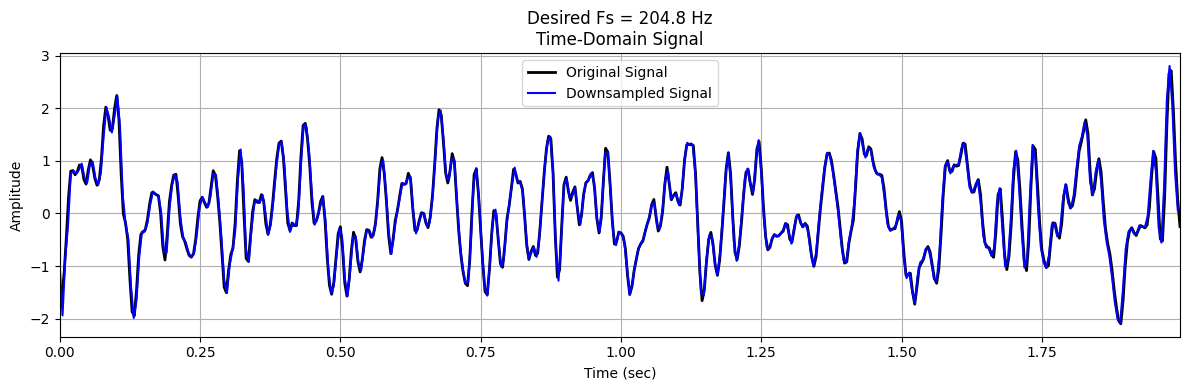

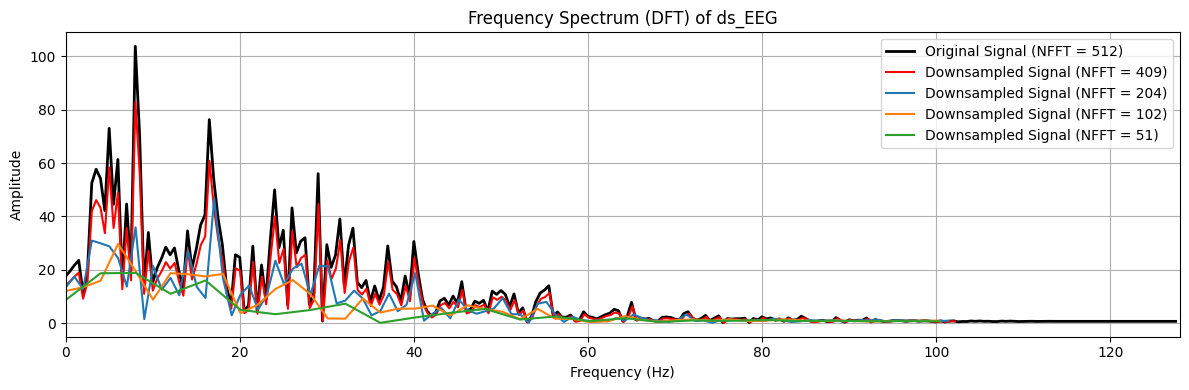

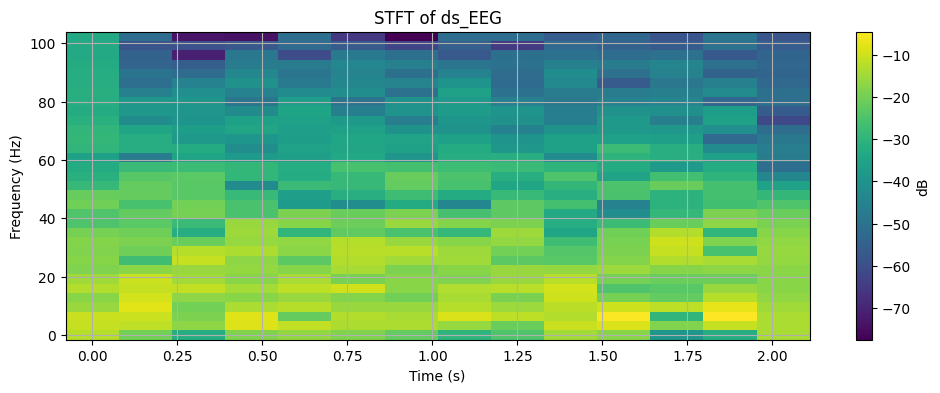

In [9]:
#%% part c

M = [8] # factor downsample
desireds_fs = np.array(M)*fs/10

for desired_fs in desireds_fs:
    # Define the desired lower sampling rate
    t = np.arange(0, 512) / fs
    
    # Step 1: Apply a low-pass filter
    # Design a Butterworth low-pass filter
    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')
    
    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal)
    
    # Step 2: Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)),)
    
    # Step 3: Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(12, 4))
    plt.plot(t, signal, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Desired Fs = {} Hz".format(desired_fs) + "\nTime-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Frequency Spectrum (DFT) of ds_EEG
    plt.figure(figsize=(12, 4))
    dft = fft(signal)
    freq = np.fft.fftfreq(len(signal), 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'k', label="Original Signal (NFFT = {})".format(len(signal)), lw=2)
    
    dft = fft(downsampled_signal)
    freq = np.fft.fftfreq(len(downsampled_signal), 1/desired_fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Downsampled Signal (NFFT = {})".format(len(downsampled_signal)), lw=1.5)
    
    NFFT0 = len(downsampled_signal)
    NFFTs = [NFFT0//2, NFFT0//4, NFFT0//8]
    
    for NFFT in NFFTs:
        dft_ds_EEG = fft(downsampled_signal, NFFT)
        freq_ds_EEG = np.fft.fftfreq(len(dft_ds_EEG), 1/desired_fs)
        positive_freq_indices = np.where(freq_ds_EEG >= 0)
        plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), label="Downsampled Signal (NFFT = {})".format(NFFT))
    
    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.show()
    
    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(12, 4))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.show()

In this section focus on downsampling a given signal by a specific factor (M=8). It aims to explore the effects of this downsampling process on the signal's time-domain representation, frequency content, and time-frequency characteristics using the Short-Time Fourier Transform (STFT).

1. **Defining the Downsampling Factor and Desired Sampling Rate:**
   - The code sets the downsampling factor (M) to 8, which means that the signal's sampling rate will be reduced by a factor of 8.
   - It calculates the desired lower sampling rate (desired_fs) based on this factor and the original sampling rate (fs).

2. **Low-Pass Filtering and Downsampling:**
   - The code follows the same steps as in "part b" to apply low-pass filtering using a Butterworth filter and then downsamples the filtered signal to achieve the desired lower sampling rate.
   
3. **Plotting Results for Each Desired Sampling Rate:**
   - Similar to "part b," the code generates and displays several plots for each desired sampling rate:
     - **Time Signal Plot**: This plot illustrates the original signal (in black) and the downsampled signal (in blue) in the time domain, allowing you to compare the two signals. The x-axis represents time in seconds.
     - **Frequency Spectrum (DFT) Plot**: This plot shows the frequency content of both the original and downsampled signals. It displays the amplitude spectrum of the signals and can help assess the effect of downsampling on the frequency information.
     - **DFT with Different NFFT Values**: In this section, the code computes and plots the DFT of the downsampled signal using different NFFT values (NFFT0//2, NFFT0//4, NFFT0//8) to examine the impact of different spectral resolutions on the downsampled signal. This part of the code can help assess how the choice of NFFT affects the frequency representation of the downsampled signal.
     - **STFT Plot**: The code employs the STFT to generate a time-frequency representation of the downsampled signal, offering insights into how downsampling affects time-frequency characteristics.


##### Part d

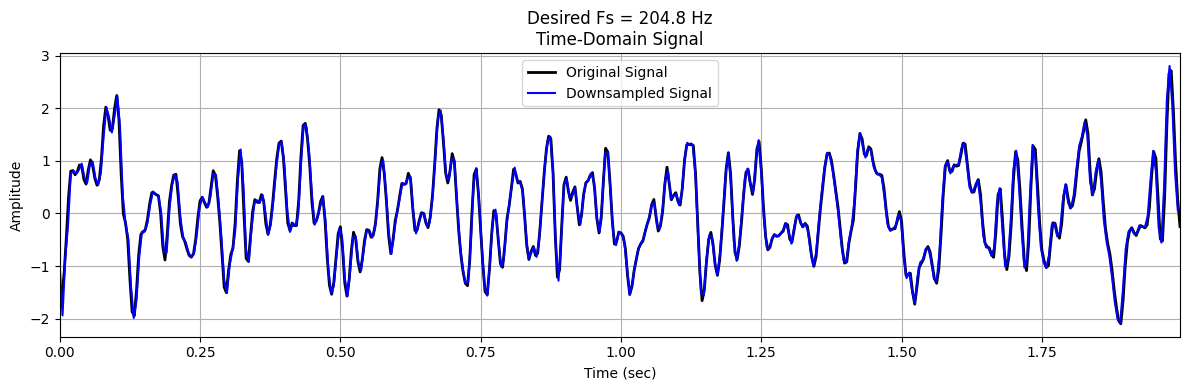

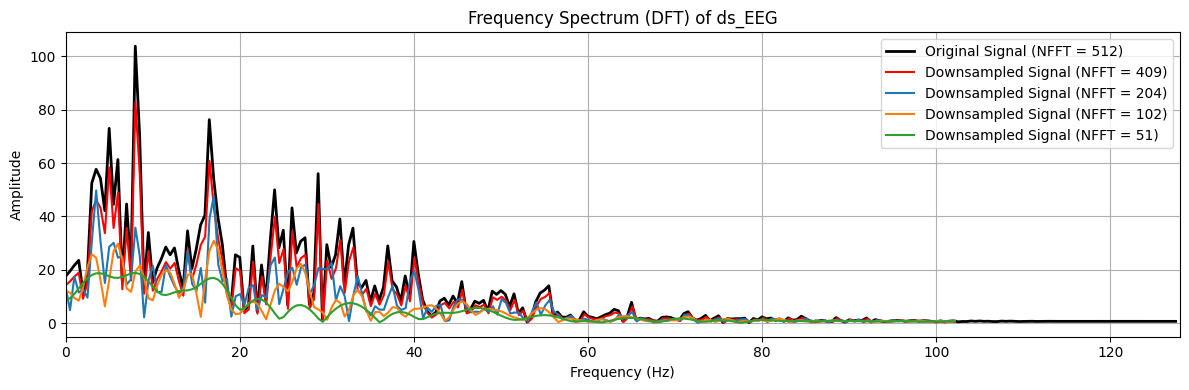

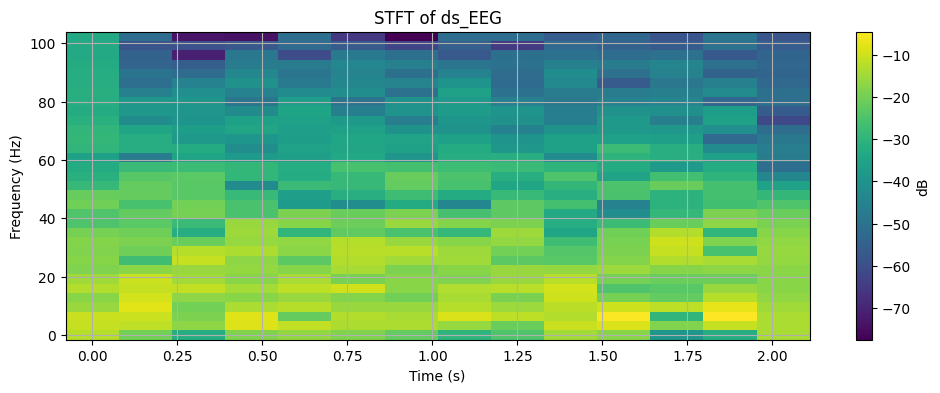

In [10]:
#%% part d

M = [8] # factor downsample
desireds_fs = np.array(M)*fs/10

for desired_fs in desireds_fs:
    # Define the desired lower sampling rate
    t = np.arange(0, 512) / fs
    
    # Step 1: Apply a low-pass filter
    # Design a Butterworth low-pass filter
    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')
    
    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal)
    
    # Step 2: Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)),)
    
    # Step 3: Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(12, 4))
    plt.plot(t, signal, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Desired Fs = {} Hz".format(desired_fs) + "\nTime-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Frequency Spectrum (DFT) of ds_EEG
    #plt.subplot(2, 1, 2)
    plt.figure(figsize=(12, 4))
    dft = fft(signal)
    freq = np.fft.fftfreq(len(signal), 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'k', label="Original Signal (NFFT = {})".format(len(signal)), lw=2)
    
    dft = fft(downsampled_signal)
    freq = np.fft.fftfreq(len(downsampled_signal), 1/desired_fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Downsampled Signal (NFFT = {})".format(len(downsampled_signal)), lw=1.5)
    
    NFFT0 = len(downsampled_signal)
    NFFTs = [NFFT0//2, NFFT0//4, NFFT0//8]
    
    for NFFT in NFFTs:
        EEG_ds2 = np.zeros(NFFT0)
        EEG_ds2[:NFFT] = downsampled_signal[:NFFT]
        dft_ds_EEG = fft(EEG_ds2, NFFT0)
        freq_ds_EEG = np.fft.fftfreq(len(dft_ds_EEG), 1/desired_fs)
        positive_freq_indices = np.where(freq_ds_EEG >= 0)
        plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), label="Downsampled Signal (NFFT = {})".format(NFFT))
    
    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.show()
    
    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(12, 4))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.show()

"Part d" of the code continues the investigation into the effects of downsampling a signal with a specified factor (M=8) on its time and frequency characteristics. The code performs a series of processing steps and visualizations to help understand these effects.

Here is a discussion of the key components and objectives of the code:

1. **Defining the Downsampling Factor and Desired Sampling Rate:**
   - Similar to "part c," the code sets the downsampling factor (M) to 8 and calculates the desired lower sampling rate (desired_fs) based on this factor and the original sampling rate (fs).

2. **Low-Pass Filtering and Downsampling:**
   - Just as in the previous parts, the code designs a low-pass Butterworth filter with a specific cutoff frequency and applies it to the original signal (signal).
   - The filtered signal is then downsampled to achieve the desired lower sampling rate.

3. **Plotting Results for Each Desired Sampling Rate:**
   - The code generates and displays a series of plots for each desired sampling rate:
     - **Time Signal Plot**: This plot visualizes both the original signal (in black) and the downsampled signal (in blue) in the time domain. It allows for a direct comparison of the signals over time.
     - **Frequency Spectrum (DFT) Plot**: Similar to "part c," this plot shows the frequency content of both the original and downsampled signals. It provides insights into how downsampling affects the frequency domain.
     - **DFT with Different NFFT Values**: In this section, the code computes and plots the DFT of the downsampled signal using different NFFT values (NFFT0//2, NFFT0//4, NFFT0//8). This is done to explore the impact of different spectral resolutions on the downsampled signal.
     - **STFT Plot**: The Short-Time Fourier Transform (STFT) is used to generate a time-frequency representation of the downsampled signal. This plot reveals how downsampling influences time-frequency characteristics.essing applications.

In the provided code section, it appears that zero-padding is applied to the downsampled signal before performing the Discrete Fourier Transform (DFT) with different NFFT (number of data points for the DFT) values. Zero-padding involves extending the signal with additional zero values to reach the desired length for the DFT.


**Effects of Zero-Padding:**

1. **Improved Frequency Resolution**: Zero-padding increases the number of data points for the DFT, resulting in a finer frequency resolution in the frequency domain representation. This means that smaller frequency components can be more accurately distinguished.

2. **Smoothing of Spectral Peaks**: Zero-padding can provide smoother spectral peaks in the frequency domain, making it easier to identify and analyze spectral features.

3. **Interpolation of Frequency Components**: The additional zero values introduce interpolated data points in the frequency domain, which can help in identifying frequency components between the original data points.

4. **Computational Overhead**: Zero-padding increases the computational workload for the DFT calculation since it involves processing more data points. This may be a consideration in terms of computational efficiency.

Overall, zero-padding is a technique commonly used in signal processing to enhance the frequency resolution and provide more detailed information in the frequency domain representation. However, the choice of how much zero-padding to apply should be carefully considered, as it affects the trade-off between computational resources and the accuracy of the frequency analysis.

#### Question 3

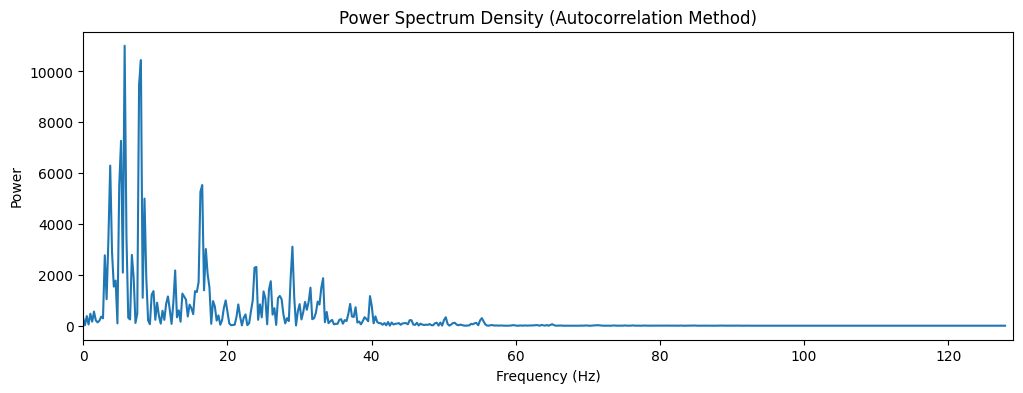

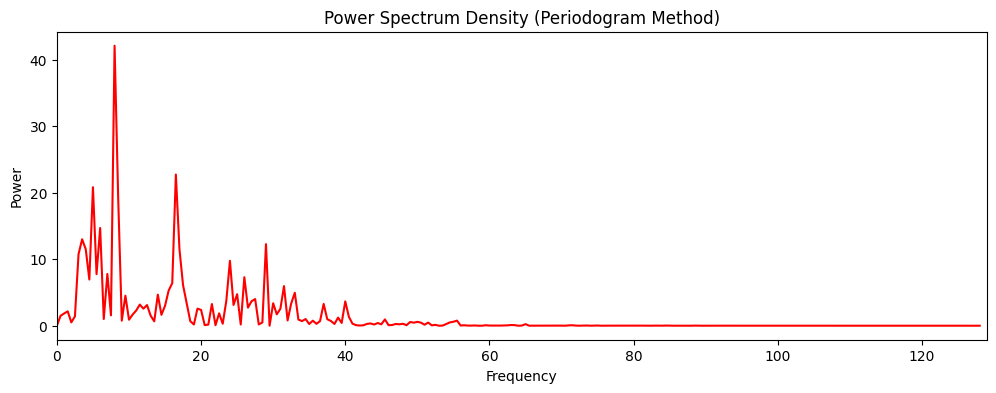

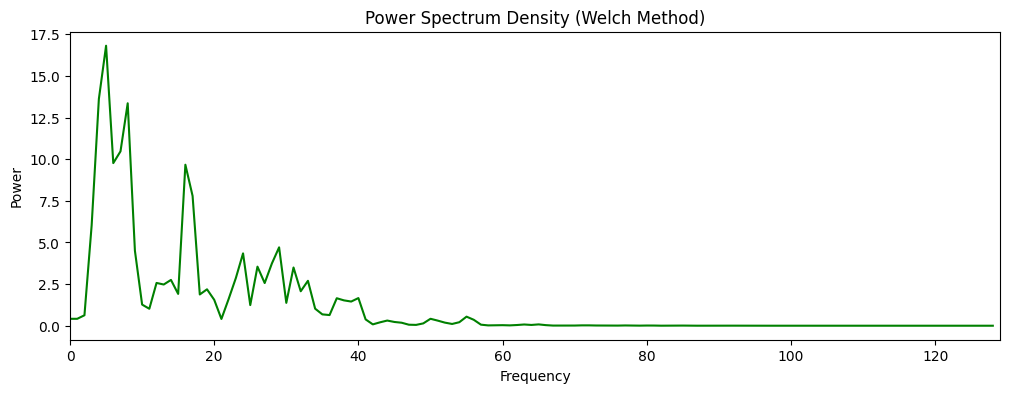

In [11]:
#%% Question 3
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, welch
from scipy.io import loadmat
from scipy.fft import fft
from scipy.signal import stft

# Load the signal from the .mat file
signal = loadmat('D:/Sharif/Term 3/EEG/Comp HWs/Comp_HW1/NewEEGSignal.mat')['NewEEGSignal'][0]
fs = 256 #Hz
t = np.arange(0, 512) / fs


# a) Autocorrelation method
autocorr = np.correlate(signal, signal, mode='full')
power_autocorr = np.abs(np.fft.fft(autocorr))
freqs = np.fft.fftfreq(len(power_autocorr), 1/fs)
plt.figure(figsize=(12, 4))
plt.plot(freqs[:512], power_autocorr[:512])
plt.title('Power Spectrum Density (Autocorrelation Method)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim([0, 129])

# b) Periodogram method
freqs, power_periodogram = periodogram(signal)
plt.figure(figsize=(12, 4))
plt.plot(freqs*fs, power_periodogram, 'r')
plt.title('Power Spectrum Density (Periodogram Method)')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim([0, 129])

# c) Welch method
freqs, power_welch = welch(signal)
plt.figure(figsize=(12, 4))
plt.plot(freqs*fs, power_welch, 'g')
plt.title('Power Spectrum Density (Welch Method)')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim([0, 129])
plt.show()

In this section the analysis of a given signal using three different methods to estimate its power spectral density (PSD). Each method provides insights into the frequency content of the signal, allowing for different perspectives on its spectral characteristics.

1. **Autocorrelation Method** (a):
   - The code computes the autocorrelation of the signal by correlating it with itself. This operation quantifies the similarity between the signal and a time-shifted version of itself.
   - The Fast Fourier Transform (FFT) is applied to the autocorrelation function to obtain its power spectrum. This yields information about the signal's periodicity and fundamental frequencies.
   - The code plots the power spectrum in the frequency domain, providing insights into the dominant frequency components of the signal. The Autocorrelation Method is effective for identifying periodic patterns and fundamental frequencies.

2. **Periodogram Method** (b):
   - The periodogram is calculated using the `periodogram` function, which estimates the PSD of the signal directly from its samples.
   - The code plots the power spectrum in the frequency domain based on the periodogram. This method provides a straightforward view of the signal's spectral characteristics and dominant frequencies.

3. **Welch Method** (c):
   - The Welch method segments the signal into overlapping windows, computes the periodogram for each window, and averages the results to obtain a smoother estimate of the PSD. This method is effective in reducing spectral leakage and providing a more accurate representation of the signal's frequency content.
   - The code employs the `welch` function to compute the PSD using the Welch method.
   - The power spectrum is plotted in the frequency domain, offering a clear view of the signal's spectral characteristics.

Overall, the code allows for a comprehensive analysis of the signal's power spectral density using three distinct methods. Researchers can choose the method that best suits their specific requirements and provides the most meaningful insights into the signal's frequency components. This code is a valuable tool for understanding the spectral characteristics of signals in various applications, including signal processing and frequency analysis.